Frigas Hanifyan Zalwi

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Data Understanding

In [2]:
mvps_df = pd.read_csv("datasets/mvps.csv",";")
nicknames_df = pd.read_csv("datasets/nicknames.csv",";")
player_mvp_stats_df = pd.read_csv("datasets/player_mvp_stats.csv",";")
players_df = pd.read_csv("datasets/players.csv",";")
salaries_df = pd.read_csv("datasets/salaries.csv")
teams_df = pd.read_csv("datasets/teams.csv",";")

C:\Users\imman\AppData\Local\Temp\ipykernel_17868\3032161429.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  mvps_df = pd.read_csv("datasets/mvps.csv",";")
C:\Users\imman\AppData\Local\Temp\ipykernel_17868\3032161429.py:2: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  nicknames_df = pd.read_csv("datasets/nicknames.csv",";")
C:\Users\imman\AppData\Local\Temp\ipykernel_17868\3032161429.py:3: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  player_mvp_stats_df = pd.read_csv("datasets/player_mvp_stats.csv",";")
C:\Users\imman\AppData\Local\Temp\ipykernel_17868\3032161429.py:4: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.

Rank : urutan ranking mvp pada periode tahun berikut

Tm : Tim dari player

First : First Place Votes

Pts Won : Points Won

Pts Max : Max points

Share : Points Share

G : Games Played

MP : avg minutes per game

PTS : avg point per game

TRB : avg total rebound per game

AST : avg total assists per game

STL : avg steal per game

BLK : avg block per game

In [3]:
display_cnt = 15
def display_both_head_and_tail(dataset):
    return dataset.head(display_cnt).append(dataset.tail(display_cnt))

In [4]:
def cek_missing_values(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data[missing_data['Total'] > 0]

Dataset mvps

In [5]:
display_both_head_and_tail(mvps_df)

C:\Users\imman\AppData\Local\Temp\ipykernel_17868\3276194388.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return dataset.head(display_cnt).append(dataset.tail(display_cnt))


,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,1,Michael Jordan,27,CHI,77,891,960,928.00,82,37.0,...,6.0,5.5,2.7,1.0,539.00,312.00,851.00,20.3,321.00,1991
1,2,Magic Johnson,31,LAL,10,497,960,518.00,79,37.1,...,7.0,12.5,1.3,0.2,477.00,0.32,906.00,15.4,251.00,1991
2,3,David Robinson,25,SAS,6,476,960,496.00,82,37.7,...,13.0,2.5,1.5,3.9,552.00,143.00,762.00,17.0,264.00,1991
3,4,Charles Barkley,27,PHI,2,222,960,231.00,67,37.3,...,10.1,4.2,1.6,0.5,0.57,284.00,722.00,13.4,258.00,1991
4,5,Karl Malone,27,UTA,0,142,960,148.00,82,40.3,...,11.8,3.3,1.1,1.0,527.00,286.00,0.77,15.5,225.00,1991
5,6,Clyde Drexler,28,POR,1,75,960,78.00,82,34.8,...,6.7,6.0,1.8,0.7,482.00,319.00,794.00,12.4,209.00,1991
6,7,Kevin Johnson,24,PHO,0,32,960,33.00,77,36.0,...,3.5,10.1,2.1,0.1,516.00,205.00,843.00,12.7,0.22,1991
7,8,Dominique Wilkins,31,ATL,0,29,960,0.03,81,38.0,...,9.0,3.3,1.5,0.8,0.47,341.00,829.00,11.4,177.00,1991
8,9T,Larry Bird,34,BOS,0,25,960,26.00,60,38.0,...,8.5,7.2,1.8,1.0,454.00,389.00,891.00,6.6,0.14,1991
9,9T,Terry Porter,27,POR,0,25,960,26.00,81,32.9,...,3.5,8.0,2.0,0.1,515.00,415.00,823.00,13.0,235.00,1991


In [6]:
mvps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rank     474 non-null    object 
 1   Player   474 non-null    object 
 2   Age      474 non-null    int64  
 3   Tm       474 non-null    object 
 4   First    474 non-null    int64  
 5   Pts Won  474 non-null    int64  
 6   Pts Max  474 non-null    int64  
 7   Share    474 non-null    float64
 8   G        474 non-null    int64  
 9   MP       474 non-null    float64
 10  PTS      474 non-null    float64
 11  TRB      474 non-null    float64
 12  AST      474 non-null    float64
 13  STL      474 non-null    float64
 14  BLK      474 non-null    float64
 15  FG%      474 non-null    float64
 16  3P%      474 non-null    float64
 17  FT%      474 non-null    float64
 18  WS       474 non-null    float64
 19  WS/48    474 non-null    float64
 20  Year     474 non-null    int64  
dtypes: float64(12), 

In [7]:
print("Tidak ditemukan missing value pada dataset mvps")
cek_missing_values(mvps_df)

Tidak ditemukan missing value pada dataset mvps


,Total,Percent


In [8]:
print("Jumlah duplikasi data pada dataset mvps:", mvps_df.duplicated().sum())

Jumlah duplikasi data pada dataset mvps: 0


Dataset nicknames

In [9]:
display_both_head_and_tail(nicknames_df)

C:\Users\imman\AppData\Local\Temp\ipykernel_17868\3276194388.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return dataset.head(display_cnt).append(dataset.tail(display_cnt))


,Abbreviation,Name
0,ATL,Atlanta Hawks
1,BRK,Brooklyn Nets
2,BKN,Brooklyn Nets
3,BOS,Boston Celtics
4,CHA,Charlotte Bobcats
5,CHH,Charlotte Hornets
6,CHO,Charlotte Hornets
7,CHI,Chicago Bulls
8,CLE,Cleveland Cavaliers
9,DAL,Dallas Mavericks


In [10]:
nicknames_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Abbreviation  40 non-null     object
 1   Name          40 non-null     object
dtypes: object(2)
memory usage: 768.0+ bytes


In [11]:
print("Tidak ditemukan missing value pada dataset nicknames")
cek_missing_values(nicknames_df)

Tidak ditemukan missing value pada dataset nicknames


,Total,Percent


In [12]:
print("Jumlah duplikasi data pada dataset nicknames:", nicknames_df.duplicated().sum())

Jumlah duplikasi data pada dataset nicknames: 0


Dataset player mvp stats

In [13]:
display_both_head_and_tail(player_mvp_stats_df)

C:\Users\imman\AppData\Local\Temp\ipykernel_17868\3276194388.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return dataset.head(display_cnt).append(dataset.tail(display_cnt))


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,476.00,...,0,0.0,Los Angeles Lakers,58,24,707.0,5.0,106.3,99.6,6.73
1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,477.00,...,0,0.0,Los Angeles Lakers,58,24,707.0,5.0,106.3,99.6,6.73
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,455.00,...,0,0.0,Los Angeles Lakers,58,24,707.0,5.0,106.3,99.6,6.73
3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,0.34,...,0,0.0,Los Angeles Lakers,58,24,707.0,5.0,106.3,99.6,6.73
4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,492.00,...,0,0.0,Los Angeles Lakers,58,24,707.0,5.0,106.3,99.6,6.73
5,Larry Drew,PG,32,LAL,48,2,10.3,1.1,2.6,432.00,...,0,0.0,Los Angeles Lakers,58,24,707.0,5.0,106.3,99.6,6.73
6,Magic Johnson,PG,31,LAL,79,79,37.1,5.9,12.4,477.00,...,960,518.0,Los Angeles Lakers,58,24,707.0,5.0,106.3,99.6,6.73
7,Mychal Thompson,C,36,LAL,72,4,15.0,1.6,3.2,496.00,...,0,0.0,Los Angeles Lakers,58,24,707.0,5.0,106.3,99.6,6.73
8,Sam Perkins,PF,29,LAL,73,66,34.3,5.0,10.2,495.00,...,0,0.0,Los Angeles Lakers,58,24,707.0,5.0,106.3,99.6,6.73
9,Terry Teagle,SG,30,LAL,82,0,18.3,4.1,9.2,443.00,...,0,0.0,Los Angeles Lakers,58,24,707.0,5.0,106.3,99.6,6.73


In [14]:
display_both_head_and_tail(player_mvp_stats_df)
player_mvp_stats_df.isna().sum()
temp = (player_mvp_stats_df['FG'] - (player_mvp_stats_df['2P'] + player_mvp_stats_df['3P'])) > 0.100001
player_mvp_stats_df[temp]

C:\Users\imman\AppData\Local\Temp\ipykernel_17868\3276194388.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return dataset.head(display_cnt).append(dataset.tail(display_cnt))


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS


In [15]:
player_mvp_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14092 entries, 0 to 14091
Data columns (total 41 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   14092 non-null  object 
 1   Pos      14092 non-null  object 
 2   Age      14092 non-null  int64  
 3   Tm       14092 non-null  object 
 4   G        14092 non-null  int64  
 5   GS       14092 non-null  int64  
 6   MP       14092 non-null  float64
 7   FG       14092 non-null  float64
 8   FGA      14092 non-null  float64
 9   FG%      14042 non-null  float64
 10  3P       14092 non-null  float64
 11  3PA      14092 non-null  float64
 12  3P%      12050 non-null  float64
 13  2P       14092 non-null  float64
 14  2PA      14092 non-null  float64
 15  2P%      14008 non-null  float64
 16  eFG%     14042 non-null  float64
 17  FT       14092 non-null  float64
 18  FTA      14092 non-null  float64
 19  FT%      13630 non-null  float64
 20  ORB      14092 non-null  float64
 21  DRB      140

In [16]:
print("Terdapat missing values pada dataset player mvp stats")
cek_missing_values(player_mvp_stats_df)

Terdapat missing values pada dataset player mvp stats


,Total,Percent
3P%,2042,0.144905
FT%,462,0.032785
2P%,84,0.005961
eFG%,50,0.003548
FG%,50,0.003548


In [17]:
print("Missing values tersebut diisi dengan median setiap atribut")

player_mvp_stats_df["3P%"].fillna(player_mvp_stats_df["3P%"].median(), inplace=True)
player_mvp_stats_df["FT%"].fillna(player_mvp_stats_df["FT%"].median(), inplace=True)
player_mvp_stats_df["2P%"].fillna(player_mvp_stats_df["2P%"].median(), inplace=True)
player_mvp_stats_df["eFG%"].fillna(player_mvp_stats_df["eFG%"].median(), inplace=True)
player_mvp_stats_df["FG%"].fillna(player_mvp_stats_df["FG%"].median(), inplace=True)

Missing values tersebut diisi dengan median setiap atribut


In [18]:
print("Sudah tidak ada missing value pada dataset palyer mvp stats")
cek_missing_values(player_mvp_stats_df)

Sudah tidak ada missing value pada dataset palyer mvp stats


,Total,Percent


In [19]:
print("Jumlah duplikasi data pada dataset palyer mvp stats:", player_mvp_stats_df.duplicated().sum())

Jumlah duplikasi data pada dataset palyer mvp stats: 0


Dataset players

In [20]:
display_both_head_and_tail(players_df)

C:\Users\imman\AppData\Local\Temp\ipykernel_17868\3276194388.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return dataset.head(display_cnt).append(dataset.tail(display_cnt))


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,2,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,15.1,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,3,Mark Acres,C,28,ORL,68,0,19.3,1.6,3.1,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,4,Michael Adams,PG,28,DEN,66,66,35.5,8.5,21.5,...,0.9,3,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,5,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,11.7,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991
5,6,Danny Ainge,SG,31,POR,80,0,21.4,4.2,8.9,...,0.6,2,2.6,3.6,0.8,0.2,1.3,2.4,11.1,1991
6,7,Mark Alarie,PF,27,WSB,42,1,14,2.4,5.4,...,1,1.8,2.8,1.1,0.4,0.2,1,2.1,5.8,1991
7,8,Steve Alford,PG,26,DAL,34,0,6.9,1.7,3.4,...,0.3,0.4,0.7,0.6,0.2,0,0.5,0.3,4.4,1991
8,9,Greg Anderson,PF,26,TOT,68,2,13.6,1.7,4,...,1.4,3.3,4.7,0.2,0.5,0.7,1.2,2.1,4.3,1991
9,9,Greg Anderson,PF,26,MIL,26,0,9.5,1,2.8,...,1,1.9,2.9,0.1,0.3,0.3,0.8,1.1,2.7,1991


In [21]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18044 entries, 0 to 18043
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rk      18044 non-null  object
 1   Player  18044 non-null  object
 2   Pos     18044 non-null  object
 3   Age     18044 non-null  object
 4   Tm      18044 non-null  object
 5   G       18044 non-null  object
 6   GS      18044 non-null  object
 7   MP      18044 non-null  object
 8   FG      18044 non-null  object
 9   FGA     18044 non-null  object
 10  FG%     18044 non-null  object
 11  3P      18044 non-null  object
 12  3PA     18044 non-null  object
 13  3P%     18044 non-null  object
 14  2P      18044 non-null  object
 15  2PA     18044 non-null  object
 16  2P%     18044 non-null  object
 17  eFG%    18044 non-null  object
 18  FT      18044 non-null  object
 19  FTA     18044 non-null  object
 20  FT%     18044 non-null  object
 21  ORB     18044 non-null  object
 22  DRB     18044 non-null

In [22]:
print("Tidak ditemukan missing value pada dataset players")
cek_missing_values(players_df)

Tidak ditemukan missing value pada dataset players


,Total,Percent


In [23]:
print("Jumlah duplikasi data pada dataset mvps:", players_df.duplicated().sum(), "maka lakukan drop data terlebih dahulu")

players_df = players_df.drop_duplicates(inplace = False)
print("Jumlah duplikasi data setelah drop duplikasinya:", players_df.duplicated().sum())

Jumlah duplikasi data pada dataset mvps: 627 maka lakukan drop data terlebih dahulu
Jumlah duplikasi data setelah drop duplikasinya: 0


In [24]:
# Terdapat row yang berisi nama dari row tersebut
wrong_value = players_df.loc[players_df['Rk'] == 'Rk']
wrong_value

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
47,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,1991
507,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,1992
983,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,1993
1451,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,1994
1948,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,1995
2421,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,1996
2991,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,1997
3589,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,1998
4146,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,1999
4673,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2000


In [25]:
# Drop data tersebut
players_df.drop(players_df.index[players_df['Rk'] == 'Rk'], inplace = True)

# Mengecek kembali keberadaan row yang sudah di drop
wrong_value = players_df.loc[players_df['Rk'] == 'Rk']
wrong_value

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year


In [26]:
players_df["Player"] = players_df["Player"].str.replace("*", "", regex=False)

players_df["Player"] = players_df["Player"].str.replace("?", "", regex=False)

Dataset salaries

In [27]:
display_both_head_and_tail(salaries_df)

C:\Users\imman\AppData\Local\Temp\ipykernel_17868\3276194388.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return dataset.head(display_cnt).append(dataset.tail(display_cnt))


,Unnamed: 0,Name,Year,Salaries,Rank
0,1,Shaquille O'Neal,2000,17142000.0,1
1,2,Kevin Garnett,2000,16806000.0,2
2,3,Alonzo Mourning,2000,15004000.0,3
3,4,Juwan Howard,2000,15000000.0,4
4,5,Scottie Pippen,2000,14795000.0,5
5,6,Karl Malone,2000,14000000.0,6
6,7,Larry Johnson,2000,11910000.0,7
7,8,Gary Payton,2000,11020000.0,8
8,9,Rasheed Wallace,2000,10800000.0,9
9,10,Shawn Kemp,2000,10780000.0,10


In [28]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37420 entries, 0 to 37419
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  37420 non-null  int64  
 1   Name        37420 non-null  object 
 2   Year        37420 non-null  int64  
 3   Salaries    9346 non-null   float64
 4   Rank        37420 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ MB


In [29]:
print("Terdapat missing values pada dataset salaries")
cek_missing_values(salaries_df)

Terdapat missing values pada dataset salaries


,Total,Percent
Salaries,28074,0.750241


In [30]:
print("Missing values tersebut diisi dengan median setiap atribut")

salaries_df.Salaries.fillna(salaries_df.Salaries.median(), inplace=True)

Missing values tersebut diisi dengan median setiap atribut


In [31]:
print("Sudah tidak ada missing value pada dataset salaries")
cek_missing_values(salaries_df)

Sudah tidak ada missing value pada dataset salaries


,Total,Percent


Dataset teams

In [32]:
display_both_head_and_tail(teams_df)

C:\Users\imman\AppData\Local\Temp\ipykernel_17868\3276194388.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return dataset.head(display_cnt).append(dataset.tail(display_cnt))


,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,56,26,683,—,111.5,105.7,5.22,1991,Boston Celtics*
1,44,38,537,12,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,39,43,476,17,103.1,103.3,-0.43,1991,New York Knicks*
3,30,52,366,26,101.4,106.4,-4.84,1991,Washington Bullets
4,26,56,317,30,102.9,107.5,-4.53,1991,New Jersey Nets
5,24,58,293,32,101.8,107.8,-5.91,1991,Miami Heat
6,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,1991,Central Division
7,61,21,744,—,110,101,8.57,1991,Chicago Bulls*
8,50,32,0.61,11,100.1,96.8,3.08,1991,Detroit Pistons*
9,48,34,585,13,106.4,104,2.33,1991,Milwaukee Bucks*


In [33]:
teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   W       1033 non-null   object
 1   L       1033 non-null   object
 2   W/L%    1033 non-null   object
 3   GB      1033 non-null   object
 4   PS/G    1033 non-null   object
 5   PA/G    1033 non-null   object
 6   SRS     1033 non-null   object
 7   Year    1033 non-null   int64 
 8   Team    1033 non-null   object
dtypes: int64(1), object(8)
memory usage: 72.8+ KB


In [34]:
print("Tidak ditemukan missing value pada dataset teams")
cek_missing_values(teams_df)

Tidak ditemukan missing value pada dataset teams


,Total,Percent


In [35]:
print("Jumlah duplikasi data pada dataset teams:", teams_df.duplicated().sum())

Jumlah duplikasi data pada dataset teams: 0


In [36]:
teams_df = teams_df[~teams_df["W"].str.contains("Division")]

teams_df["Team"] = teams_df["Team"].str.replace("*", "", regex=False)

#Menghilangkan tanda * pada nama teams

C:\Users\imman\AppData\Local\Temp\ipykernel_17868\1247421660.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(mvps_df.corr(), cmap="YlGnBu", annot=True, )


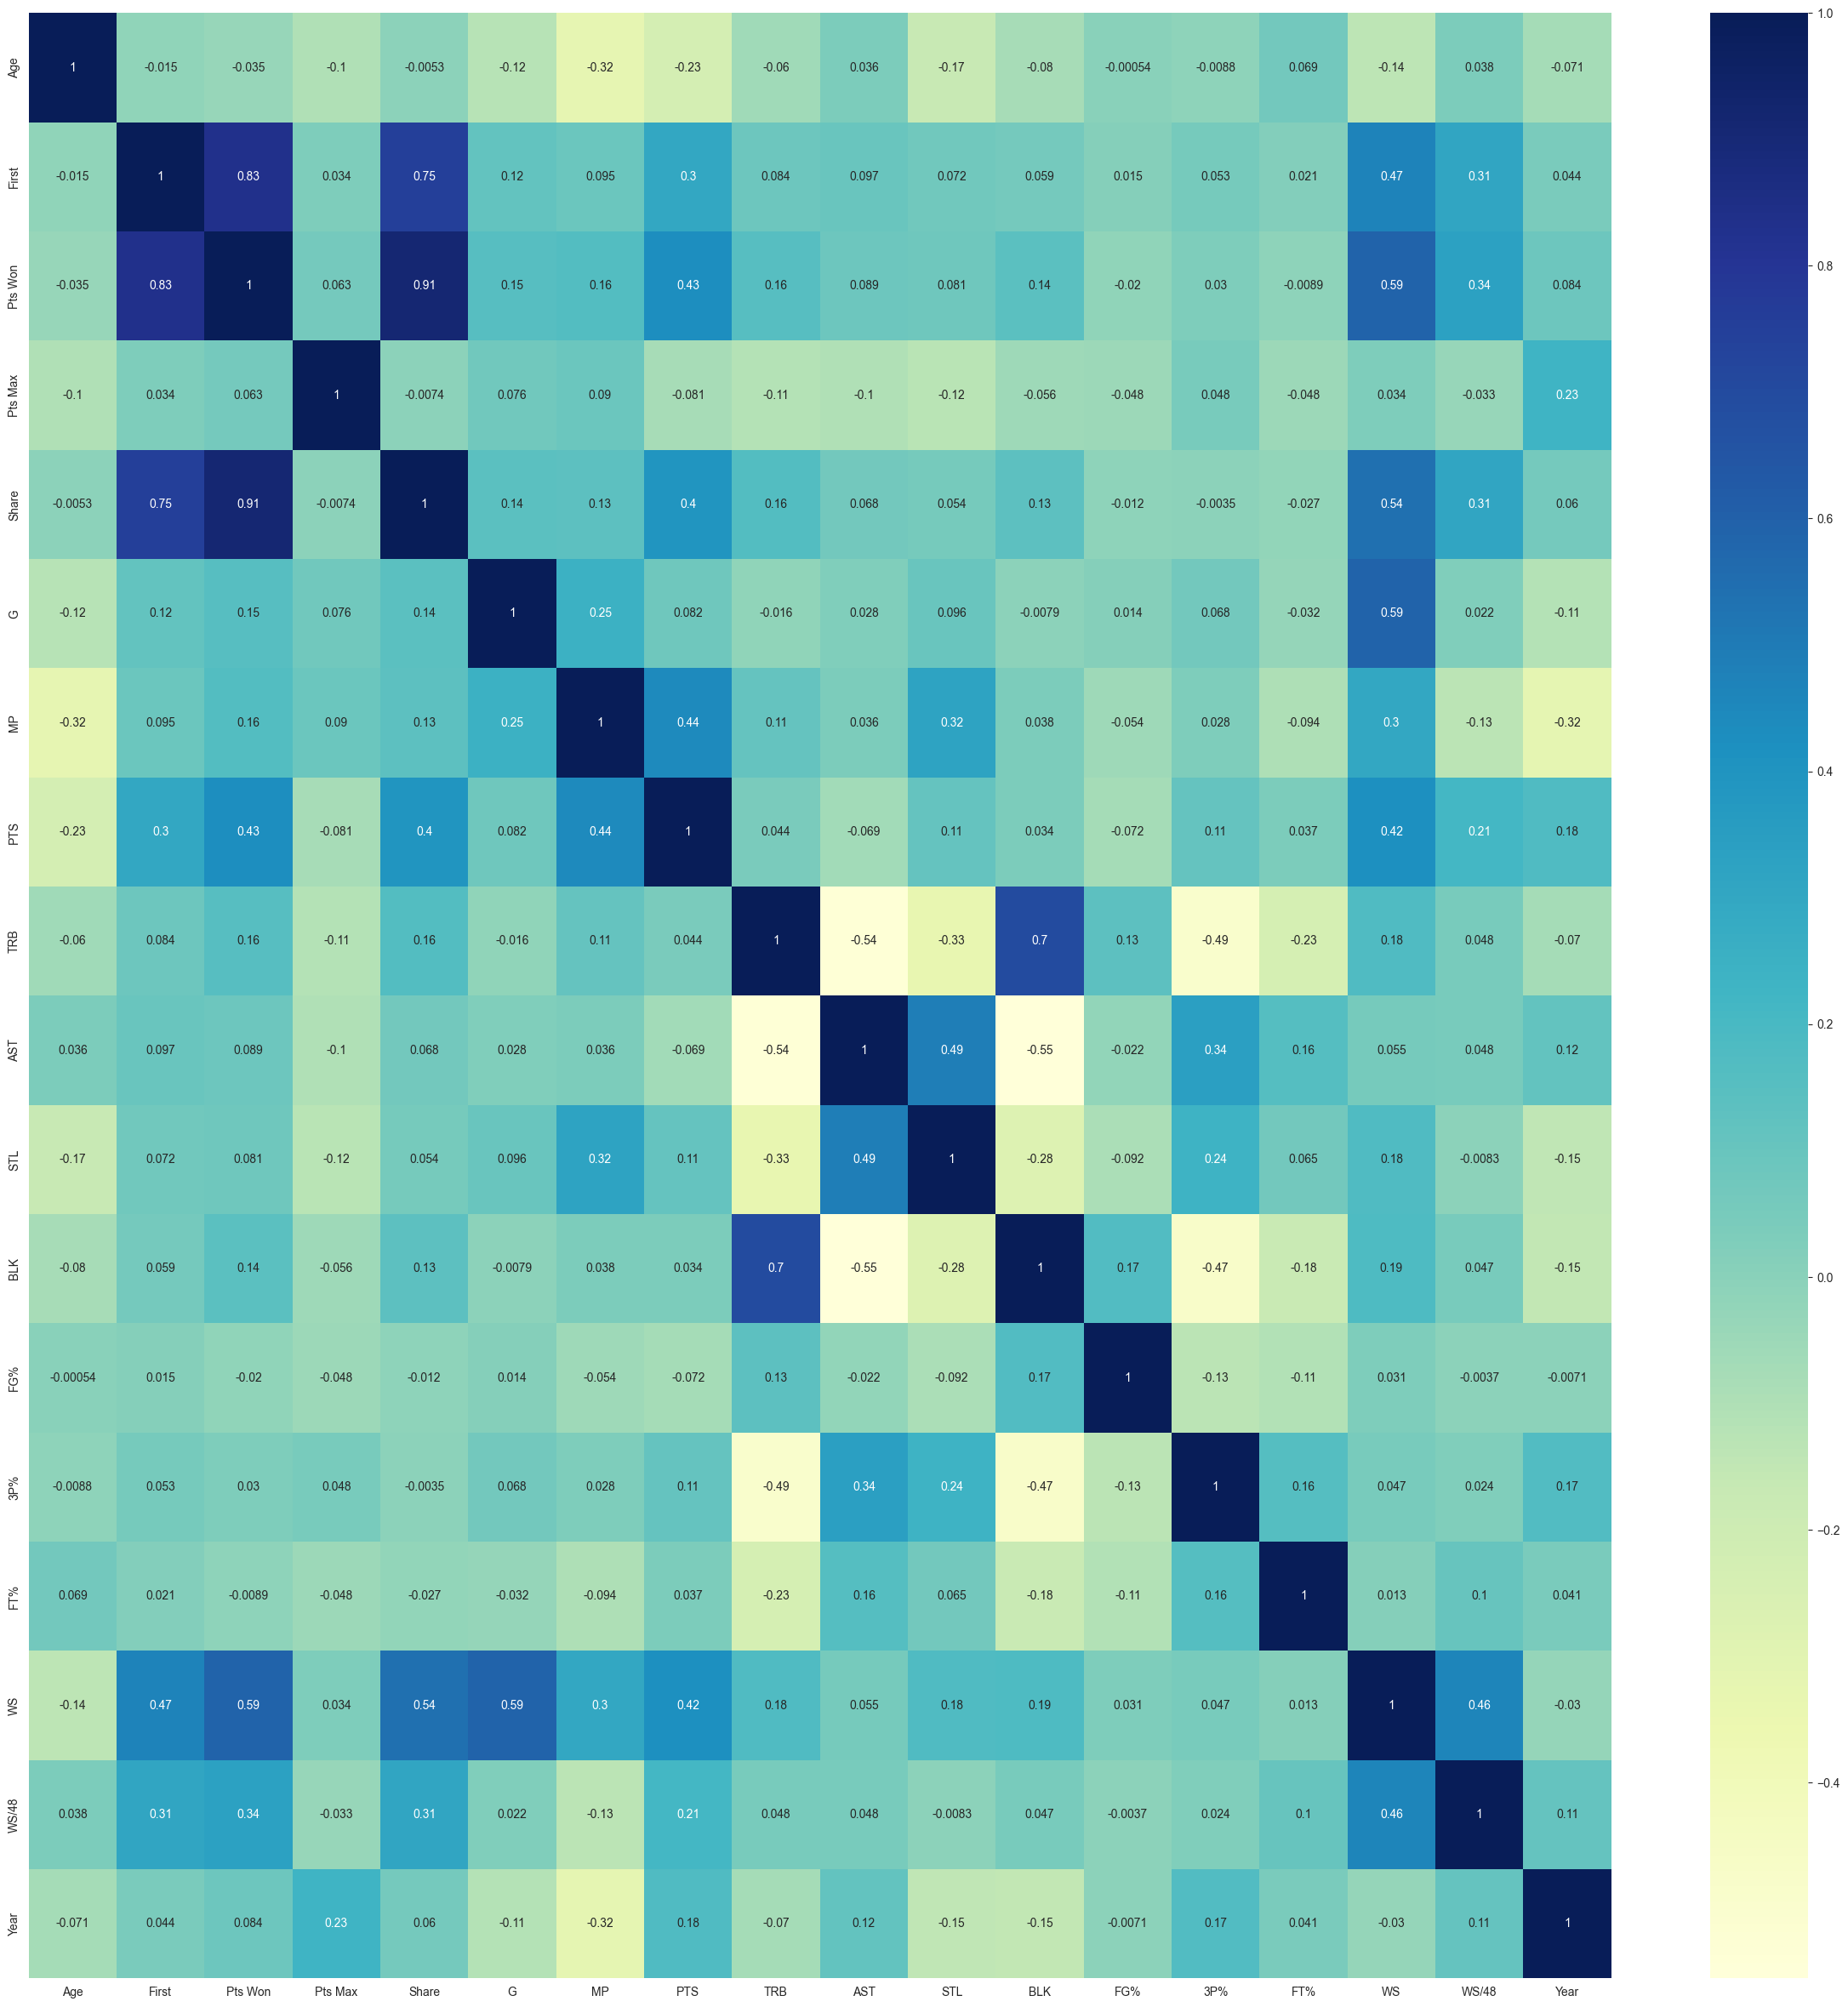

In [37]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize=(30,30))

dataplot = sb.heatmap(mvps_df.corr(), cmap="YlGnBu", annot=True, )
  
# displaying heatmap
plt.show()

# 1. Explorasi

## 1a. Apakah yang menjadi faktor utama (secara statistik) seorang pemain menjadi MVP?

In [38]:
mvps_df["is_mvp"] = ''
display(mvps_df)

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year,is_mvp
0,1,Michael Jordan,27,CHI,77,891,960,928.0,82,37.0,...,5.5,2.7,1.0,539.00,312.00,851.00,20.3,321.0,1991,
1,2,Magic Johnson,31,LAL,10,497,960,518.0,79,37.1,...,12.5,1.3,0.2,477.00,0.32,906.00,15.4,251.0,1991,
2,3,David Robinson,25,SAS,6,476,960,496.0,82,37.7,...,2.5,1.5,3.9,552.00,143.00,762.00,17.0,264.0,1991,
3,4,Charles Barkley,27,PHI,2,222,960,231.0,67,37.3,...,4.2,1.6,0.5,0.57,284.00,722.00,13.4,258.0,1991,
4,5,Karl Malone,27,UTA,0,142,960,148.0,82,40.3,...,3.3,1.1,1.0,527.00,286.00,0.77,15.5,225.0,1991,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,11,Russell Westbrook,32,WAS,0,5,1010,5.0,65,36.4,...,11.7,1.4,0.4,439.00,315.00,656.00,3.7,75.0,2021,
470,12,Ben Simmons,24,PHI,0,3,1010,3.0,58,32.4,...,6.9,1.6,0.6,557.00,0.30,613.00,6.0,153.0,2021,
471,13T,James Harden,31,TOT,0,1,1010,1.0,44,36.6,...,10.8,1.2,0.8,466.00,362.00,861.00,7.0,208.0,2021,
472,13T,LeBron James,36,LAL,0,1,1010,1.0,45,33.4,...,7.8,1.1,0.6,513.00,365.00,698.00,5.6,179.0,2021,


In [39]:
mvps_df.loc[mvps_df["Rank"] == "1", "is_mvp"] = 1
mvps_df.loc[mvps_df["Rank"] != "1", "is_mvp"] = 0
display(mvps_df)

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year,is_mvp
0,1,Michael Jordan,27,CHI,77,891,960,928.0,82,37.0,...,5.5,2.7,1.0,539.00,312.00,851.00,20.3,321.0,1991,1
1,2,Magic Johnson,31,LAL,10,497,960,518.0,79,37.1,...,12.5,1.3,0.2,477.00,0.32,906.00,15.4,251.0,1991,0
2,3,David Robinson,25,SAS,6,476,960,496.0,82,37.7,...,2.5,1.5,3.9,552.00,143.00,762.00,17.0,264.0,1991,0
3,4,Charles Barkley,27,PHI,2,222,960,231.0,67,37.3,...,4.2,1.6,0.5,0.57,284.00,722.00,13.4,258.0,1991,0
4,5,Karl Malone,27,UTA,0,142,960,148.0,82,40.3,...,3.3,1.1,1.0,527.00,286.00,0.77,15.5,225.0,1991,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,11,Russell Westbrook,32,WAS,0,5,1010,5.0,65,36.4,...,11.7,1.4,0.4,439.00,315.00,656.00,3.7,75.0,2021,0
470,12,Ben Simmons,24,PHI,0,3,1010,3.0,58,32.4,...,6.9,1.6,0.6,557.00,0.30,613.00,6.0,153.0,2021,0
471,13T,James Harden,31,TOT,0,1,1010,1.0,44,36.6,...,10.8,1.2,0.8,466.00,362.00,861.00,7.0,208.0,2021,0
472,13T,LeBron James,36,LAL,0,1,1010,1.0,45,33.4,...,7.8,1.1,0.6,513.00,365.00,698.00,5.6,179.0,2021,0


In [40]:
arr_init_name = nicknames_df['Abbreviation'].values

for i in arr_init_name : 
    val_real_team_name = nicknames_df['Name'].loc[nicknames_df['Abbreviation'] == i].values
    mvps_df.loc[mvps_df["Tm"] == i, "Tm"] = val_real_team_name[0]

display(mvps_df)

mvps_df.rename(columns = {'Tm':'Team'}, inplace = True)

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year,is_mvp
0,1,Michael Jordan,27,Chicago Bulls,77,891,960,928.0,82,37.0,...,5.5,2.7,1.0,539.00,312.00,851.00,20.3,321.0,1991,1
1,2,Magic Johnson,31,Los Angeles Lakers,10,497,960,518.0,79,37.1,...,12.5,1.3,0.2,477.00,0.32,906.00,15.4,251.0,1991,0
2,3,David Robinson,25,San Antonio Spurs,6,476,960,496.0,82,37.7,...,2.5,1.5,3.9,552.00,143.00,762.00,17.0,264.0,1991,0
3,4,Charles Barkley,27,Philadelphia 76ers,2,222,960,231.0,67,37.3,...,4.2,1.6,0.5,0.57,284.00,722.00,13.4,258.0,1991,0
4,5,Karl Malone,27,Utah Jazz,0,142,960,148.0,82,40.3,...,3.3,1.1,1.0,527.00,286.00,0.77,15.5,225.0,1991,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,11,Russell Westbrook,32,Washington Wizards,0,5,1010,5.0,65,36.4,...,11.7,1.4,0.4,439.00,315.00,656.00,3.7,75.0,2021,0
470,12,Ben Simmons,24,Philadelphia 76ers,0,3,1010,3.0,58,32.4,...,6.9,1.6,0.6,557.00,0.30,613.00,6.0,153.0,2021,0
471,13T,James Harden,31,TOT,0,1,1010,1.0,44,36.6,...,10.8,1.2,0.8,466.00,362.00,861.00,7.0,208.0,2021,0
472,13T,LeBron James,36,Los Angeles Lakers,0,1,1010,1.0,45,33.4,...,7.8,1.1,0.6,513.00,365.00,698.00,5.6,179.0,2021,0


In [41]:

teams_col = teams_df.columns
for i in teams_col :
    if i != "Team" :
        teams_df[i] = pd.to_numeric(teams_df[i], errors='coerce')

temp_teams = teams_df.groupby("Year").mean().reset_index()
year = temp_teams['Year'].values

d = {"score" : []}
temp_pd = pd.DataFrame(data = d)
for i in year :
    val =  temp_teams['GB'].loc[temp_teams['Year'] == i].values
    temp = teams_df['GB'].loc[teams_df["Year"] == i].fillna(val[0])
    temp_pd = pd.concat([temp_pd, temp])

# del temp_pd["score"]
teams_df["GB"] = temp_pd[0]
display(teams_df)

C:\Users\imman\AppData\Local\Temp\ipykernel_17868\3852534472.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_teams = teams_df.groupby("Year").mean().reset_index()


,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,56,26,683.0,20.956522,111.5,105.7,5.22,1991,Boston Celtics
1,44,38,537.0,12.000000,105.4,105.6,-0.39,1991,Philadelphia 76ers
2,39,43,476.0,17.000000,103.1,103.3,-0.43,1991,New York Knicks
3,30,52,366.0,26.000000,101.4,106.4,-4.84,1991,Washington Bullets
4,26,56,317.0,30.000000,102.9,107.5,-4.53,1991,New Jersey Nets
...,...,...,...,...,...,...,...,...,...
1028,42,30,583.0,13.541667,112.4,110.2,2.26,2021,Dallas Mavericks
1029,38,34,528.0,4.000000,113.3,112.3,1.07,2021,Memphis Grizzlies
1030,33,39,458.0,9.000000,111.1,112.8,-1.58,2021,San Antonio Spurs
1031,31,41,431.0,11.000000,114.6,114.9,-0.20,2021,New Orleans Pelicans


In [42]:
mvps_and_teams = mvps_df.merge(teams_df, on=['Team','Year'])
display(mvps_and_teams)

,Rank,Player,Age,Team,First,Pts Won,Pts Max,Share,G,MP,...,WS/48,Year,is_mvp,W,L,W/L%,GB,PS/G,PA/G,SRS
0,1,Michael Jordan,27,Chicago Bulls,77,891,960,928.00,82,37.0,...,321.00,1991,1,61,21,744.0,20.956522,110.0,101.0,8.57
1,2,Magic Johnson,31,Los Angeles Lakers,10,497,960,518.00,79,37.1,...,251.00,1991,0,58,24,707.0,5.000000,106.3,99.6,6.73
2,3,David Robinson,25,San Antonio Spurs,6,476,960,496.00,82,37.7,...,264.00,1991,0,55,27,671.0,20.956522,107.1,102.6,4.30
3,4,Charles Barkley,27,Philadelphia 76ers,2,222,960,231.00,67,37.3,...,258.00,1991,0,44,38,537.0,12.000000,105.4,105.6,-0.39
4,5,Karl Malone,27,Utah Jazz,0,142,960,148.00,82,40.3,...,225.00,1991,0,54,28,659.0,1.000000,104.0,100.7,3.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,8,Julius Randle,26,New York Knicks,0,20,1010,0.02,71,37.6,...,0.14,2021,0,41,31,569.0,8.000000,107.0,104.7,2.13
463,10,Rudy Gobert,28,Utah Jazz,0,8,1010,8.00,71,30.8,...,248.00,2021,0,52,20,722.0,13.541667,116.4,107.2,8.97
464,11,Russell Westbrook,32,Washington Wizards,0,5,1010,5.00,65,36.4,...,75.00,2021,0,34,38,472.0,7.000000,116.6,118.5,-1.85
465,13T,LeBron James,36,Los Angeles Lakers,0,1,1010,1.00,45,33.4,...,179.00,2021,0,42,30,583.0,9.000000,109.5,106.8,2.77


In [43]:
col = mvps_and_teams.columns

for i in col :
    if i != "Rank" and i != "Player" and i != "Team" and i != "is_mvp" :
        mvps_and_teams[i] = pd.to_numeric(mvps_and_teams[i])

mvps_and_teams.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 467 entries, 0 to 466
Data columns (total 29 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rank     467 non-null    object 
 1   Player   467 non-null    object 
 2   Age      467 non-null    int64  
 3   Team     467 non-null    object 
 4   First    467 non-null    int64  
 5   Pts Won  467 non-null    int64  
 6   Pts Max  467 non-null    int64  
 7   Share    467 non-null    float64
 8   G        467 non-null    int64  
 9   MP       467 non-null    float64
 10  PTS      467 non-null    float64
 11  TRB      467 non-null    float64
 12  AST      467 non-null    float64
 13  STL      467 non-null    float64
 14  BLK      467 non-null    float64
 15  FG%      467 non-null    float64
 16  3P%      467 non-null    float64
 17  FT%      467 non-null    float64
 18  WS       467 non-null    float64
 19  WS/48    467 non-null    float64
 20  Year     467 non-null    int64  
 21  is_mvp   467 non

In [44]:
X_raw = mvps_and_teams.drop(["Rank", "Player", "Team"],axis=1)
lst_column = X_raw.columns
y = mvps_and_teams["is_mvp"]
X_raw = X_raw.drop(["is_mvp"],axis=1)

display(lst_column)

Index(['Age', 'First', 'Pts Won', 'Pts Max', 'Share', 'G', 'MP', 'PTS', 'TRB',
       'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS', 'WS/48', 'Year',
       'is_mvp', 'W', 'L', 'W/L%', 'GB', 'PS/G', 'PA/G', 'SRS'],
      dtype='object')

In [45]:
from scipy.stats import pearsonr

for i in lst_column :
    if i != "is_mvp" :
        corr, _ = pearsonr(mvps_and_teams[i], mvps_and_teams["is_mvp"])
        if corr > 0.1 :
            print(i + " : " + str(corr))

First : 0.9217981829015219
Pts Won : 0.7120673799647386
Share : 0.670899540157534
PTS : 0.25120414400397684
WS : 0.3922461508985576
WS/48 : 0.2779454293078133
W : 0.2507622586487427
W/L% : 0.1122750876854063
GB : 0.15018439064370762
SRS : 0.2557466449068877


Dengan melihat korelasi di atas diketahui bahwa terdapat 10 variable yang dapat menjadi faktor pemain menjadi MVP, yaitu First, Pts Won, Share, PTS, WS, WS/48, Win dari teamnya pada tahun itu, W/L% dari teamnya pada tahun itu, GB dari teamnya pada tahun itu, dan SRS dari teamnya pada tahun itu

In [46]:
rank_one = mvps_df.loc[mvps_df['Rank'] == '1']
display(rank_one.head())

,Rank,Player,Age,Team,First,Pts Won,Pts Max,Share,G,MP,...,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year,is_mvp
0,1,Michael Jordan,27,Chicago Bulls,77,891,960,928.00,82,37.0,...,5.5,2.7,1.0,539.00,312.00,851.0,20.3,321.00,1991,1
20,1,Michael Jordan,28,Chicago Bulls,80,900,960,938.00,80,38.8,...,6.1,2.3,0.9,519.00,0.27,832.0,17.7,274.00,1992,1
37,1,Charles Barkley,29,Phoenix Suns,59,835,980,852.00,76,37.6,...,5.1,1.6,1.0,0.52,305.00,765.0,14.4,242.00,1993,1
51,1,Hakeem Olajuwon,31,Houston Rockets,66,889,1010,0.88,80,41.0,...,3.6,1.6,3.7,528.00,421.00,716.0,14.3,0.21,1994,1
68,1,David Robinson,29,San Antonio Spurs,73,901,1050,858.00,81,38.0,...,2.9,1.7,3.2,0.53,0.30,774.0,17.5,273.00,1995,1


In [47]:
rank_one[['First', 'Pts Won', 'Share', 'PTS', 'WS', 'WS/48']].describe()

,First,Pts Won,Share,PTS,WS,WS/48
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,87.161290,1045.967742,815.060000,27.158065,15.845161,254.109677
std,23.395294,137.332804,281.320447,3.692946,2.955203,76.386628
min,44.000000,827.000000,0.880000,15.500000,9.600000,0.190000
25%,67.500000,932.500000,845.500000,25.250000,14.050000,240.000000
50%,85.000000,1066.000000,904.000000,27.600000,15.800000,274.000000
75%,109.000000,1177.000000,958.000000,29.900000,18.100000,296.500000
max,131.000000,1310.000000,998.000000,32.000000,20.400000,322.000000


## 1b. Apakah terdapat kenaikan rata-rata gaji pemain dari tahun 2000 - 2019?

In [48]:
df_salaries_year = salaries_df.groupby("Year")["Salaries"].mean().reset_index()
df_salaries_year = df_salaries_year.astype({"Year":'category'})

<AxesSubplot: xlabel='Year'>

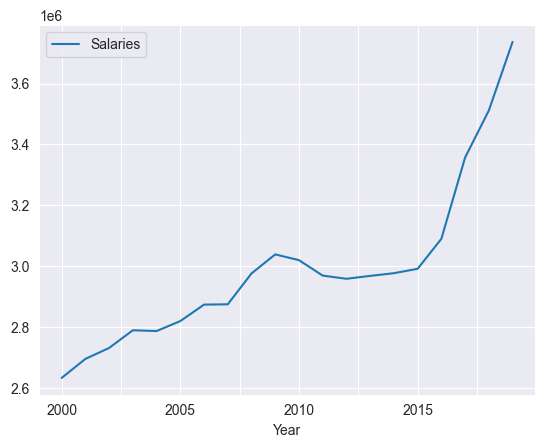

In [49]:
axes = plt.gca()
df_salaries_year.set_index('Year', inplace=True)
df_salaries_year.plot(kind="line", y="Salaries", ax=axes)

Dengan melihat grafik di atas diketahui bahwa secara garis besar terdapat perumbuhan gaji dari 2000 - 2019. Pertumbuhan gaji naik secara signifikan pada rentang 2015 - 2019. Namun, seperti yang kita ketahui nilai dari mata uang mengalami inflasi dari setiap tahunnya sehingga kita perlu membandingkan nilai pada tahun selain 2019 dengan tahun 2019. Pada kali ini saya menggunakan dataset harga persentase dolar dengan tahun 2019. Sumber data berasal dari https://www.in2013dollars.com/us/inflation/2003


<AxesSubplot: xlabel='Year'>

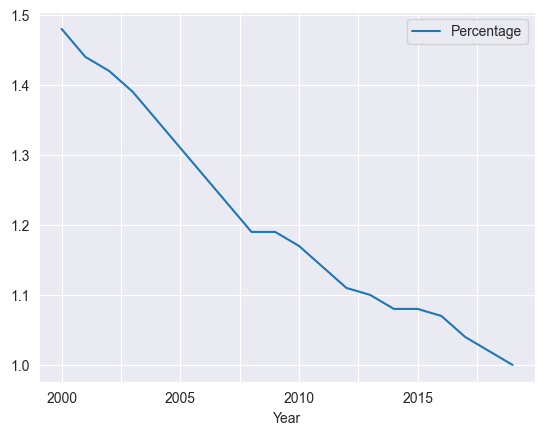

In [50]:
inflation_df = pd.read_csv("datasets/persentase_dolar.csv")
inflation_df.to_csv('datasets/persentase_dolar.csv')

inflation_df = inflation_df.astype({"Year":'category'})

axes = plt.gca()
inflation_df.set_index('Year', inplace=True)
inflation_df.plot(kind="line", y="Percentage", ax=axes)

Dari grafik di atas diketahui terdapat penurunan nilai, sehingga secara garis besar setaip tahun mengalami penurunan nilai mata uang (inflasi). Dengan demikina kita perlu mengetahui nilai asli salaries sesuai dengan tahun 2019

<AxesSubplot: xlabel='Year'>

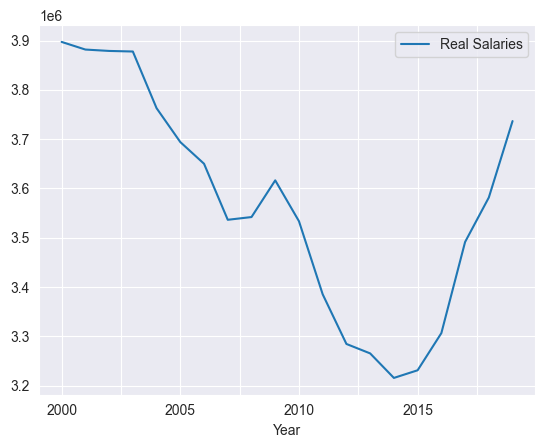

In [51]:
salaries_df_update = df_salaries_year.merge(inflation_df, on="Year").reset_index()

salaries_df_update["Real Salaries"] = salaries_df_update["Salaries"] * salaries_df_update["Percentage"]

axes = plt.gca()
salaries_df_update.set_index('Year', inplace=True)
salaries_df_update.plot(kind="line", y="Real Salaries", ax=axes)

Dari visualisasi di atas diketahui bahwa rata-rata gaji pemain pada tahun 2019 lebih kecil dibanding tahun 2000. Lalu, terjadi penurunan rata-rata gaji pemain dari rentang tahun 2000 - 2014 dan rata-rata gaji pemain mulai kembali naik pada rentang 2014-2019

## 1c. Apakah kemenangan dari suatu tim dapat dikorelasikan dengan suatu variabel tertentu?

In [52]:
display(teams_df.head())

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,56,26,683.0,20.956522,111.5,105.7,5.22,1991,Boston Celtics
1,44,38,537.0,12.000000,105.4,105.6,-0.39,1991,Philadelphia 76ers
2,39,43,476.0,17.000000,103.1,103.3,-0.43,1991,New York Knicks
3,30,52,366.0,26.000000,101.4,106.4,-4.84,1991,Washington Bullets
4,26,56,317.0,30.000000,102.9,107.5,-4.53,1991,New Jersey Nets


In [53]:
display(players_df)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,2,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,15.1,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,3,Mark Acres,C,28,ORL,68,0,19.3,1.6,3.1,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,4,Michael Adams,PG,28,DEN,66,66,35.5,8.5,21.5,...,0.9,3,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,5,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,11.7,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18039,536,Delon Wright,PG,28,SAC,27,8,25.8,3.9,8.3,...,1,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10,2021
18040,537,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,9.7,...,2.5,3.8,6.2,4.3,1.1,0.6,2,2.2,12.1,2021
18041,538,Trae Young,PG,22,ATL,63,63,33.7,7.7,17.7,...,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,2021
18042,539,Cody Zeller,C,28,CHO,48,21,20.9,3.8,6.8,...,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,2021


In [54]:
temp_player_df = players_df.copy()
temp_player_df = temp_player_df.drop(["Rk", "Player", "Pos"],axis=1)
lst_column_temp_player = temp_player_df.columns


for i in lst_column_temp_player :
    if i != "Tm" :
        temp_player_df[i] = pd.to_numeric(temp_player_df[i], errors='coerce')

In [55]:
data_player_groupby_team_and_year = temp_player_df.groupby(['Tm','Year']).mean().reset_index()
display(data_player_groupby_team_and_year.head())

,Tm,Year,Age,G,GS,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,ATL,1991,27.357143,59.928571,29.285714,19.442857,3.200000,6.935714,381.340714,0.242857,...,599.428571,1.171429,2.428571,3.600000,1.814286,0.714286,0.371429,1.221429,1.785714,8.628571
1,ATL,1992,26.600000,54.600000,27.333333,21.120000,3.773333,8.126667,465.800000,0.333333,...,529.430000,1.320000,2.466667,3.786667,2.213333,0.806667,0.326667,1.326667,1.913333,9.526667
2,ATL,1993,27.058824,49.235294,24.117647,18.529412,2.976471,6.558824,313.574118,0.347059,...,421.231176,1.194118,2.164706,3.358824,1.870588,0.776471,0.282353,1.235294,1.852941,7.694118
3,ATL,1994,28.133333,54.933333,27.333333,20.113333,3.406667,7.460000,399.367333,0.246667,...,531.097333,1.233333,2.426667,3.660000,2.040000,0.893333,0.440000,1.260000,1.740000,8.706667
4,ATL,1995,28.777778,45.833333,22.777778,19.144444,2.827778,6.544444,328.299444,0.438889,...,537.312222,1.150000,2.588889,3.727778,1.672222,0.666667,0.405556,1.238889,1.805556,7.544444


In [56]:
arr_init_name = nicknames_df['Abbreviation'].values

for i in arr_init_name : 
    val_real_team_name = nicknames_df['Name'].loc[nicknames_df['Abbreviation'] == i].values
    data_player_groupby_team_and_year.loc[data_player_groupby_team_and_year["Tm"] == i, "Tm"] = val_real_team_name[0]

In [57]:
data_player_groupby_team_and_year.rename(columns = {'Tm':'Team' }, inplace = True)


In [58]:
new_data = pd.merge(data_player_groupby_team_and_year, teams_df)


In [59]:
lst_column = new_data.columns

for i in lst_column :
    if i != "Team" and i != "Year" and i != "W":
        corr, _ = pearsonr(new_data[i], new_data["W"])
        if corr > 0.1 :
            print(i + " : " + str(corr))

Age : 0.44280206964911945
G : 0.39962093994939296
GS : 0.3651750357548144
FG% : 0.12783300867285427
3P% : 0.12018030872938029
2P% : 0.10292221361507647
eFG% : 0.11459375970752983
W/L% : 0.592452417360374
PS/G : 0.3280766228384861
SRS : 0.932136748388367


Dari hasil menggabungkan teams dan playerdata yang akhirnya mendapatkan banyak variable penilaian. Setelah dicek variable-variable yang ada dengan jumlah kemenangannya diketahui bahwa yang memiliki korelasi paling tinggi adalah dengan jumlah kemenangan adalah SRS (Simple Rating System). Namun, seperti yang kita ketahui bahwa SRS didapatkan dari persentase kemanangannya. Apabila dilihat dari komposisi pemainya beberapa varaibel yang bisa dijadikan acuan adalah  PS/G (passing per game), G (Game played), GS (Game started), FG% (Field Goal Percentage), 3P% (3 Point Field Goal Percentage), 2P% (2 Point Field Goal Percentage) dan eFG% (Effective Field Goal Percentage)

## 1d. Apakah kemenangan dari suatu tim dapat dikorelasikan dengan suatu variabel tertentu?

In [60]:
new_data['W/L%'] = new_data['W']/(new_data['W']+new_data['L'])*100
new_data['W-L%'] = abs(new_data['W']-new_data['L'])/abs(new_data['W']+new_data['L'])*100
new_data['W-L'] = abs(new_data['W']-new_data['L'])
display(new_data['W/L%'])
# new_data.to_excel("new_data.xlsx")
display(new_data)

0      52.439024
1      46.341463
2      52.439024
3      69.512195
4      51.219512
         ...    
901    26.829268
902    29.268293
903    25.609756
904    47.560976
905    53.658537
Name: W/L%, Length: 906, dtype: float64

,Team,Year,Age,G,GS,MP,FG,FGA,FG%,3P,...,PTS,W,L,W/L%,GB,PS/G,PA/G,SRS,W-L%,W-L
0,Atlanta Hawks,1991,27.357143,59.928571,29.285714,19.442857,3.200000,6.935714,381.340714,0.242857,...,8.628571,43,39,52.439024,18.000000,109.8,109.0,0.72,4.878049,4
1,Atlanta Hawks,1992,26.600000,54.600000,27.333333,21.120000,3.773333,8.126667,465.800000,0.333333,...,9.526667,38,44,46.341463,29.000000,106.2,107.7,-1.15,7.317073,6
2,Atlanta Hawks,1993,27.058824,49.235294,24.117647,18.529412,2.976471,6.558824,313.574118,0.347059,...,7.694118,43,39,52.439024,14.000000,107.5,108.4,-0.67,4.878049,4
3,Atlanta Hawks,1994,28.133333,54.933333,27.333333,20.113333,3.406667,7.460000,399.367333,0.246667,...,8.706667,57,25,69.512195,20.869565,101.4,96.2,4.94,39.024390,32
4,Atlanta Hawks,1995,28.777778,45.833333,22.777778,19.144444,2.827778,6.544444,328.299444,0.438889,...,7.544444,42,40,51.219512,10.000000,96.6,95.3,1.06,2.439024,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,Washington Bullets,1993,26.052632,43.947368,21.578947,18.515789,3.157895,6.694737,335.844211,0.163158,...,7.947368,22,60,26.829268,38.000000,101.9,108.9,-6.49,46.341463,38
902,Washington Bullets,1994,26.500000,42.300000,20.500000,18.350000,2.750000,5.965000,386.773500,0.205000,...,7.220000,24,58,29.268293,33.000000,100.4,107.7,-7.13,41.463415,34
903,Washington Bullets,1995,25.187500,50.437500,25.625000,23.550000,3.675000,8.125000,417.160000,0.475000,...,9.675000,21,61,25.609756,36.000000,100.5,106.1,-5.56,48.780488,40
904,Washington Bullets,1996,26.190476,39.142857,19.523810,18.695238,2.990476,6.404762,400.695238,0.509524,...,7.957143,39,43,47.560976,21.000000,102.5,101.5,0.99,4.878049,4


In [61]:
new_data_three = new_data.groupby('Year')['W-L%'].mean().reset_index()

display(new_data_three[new_data_three['W-L%'] == new_data_three['W-L%'].min()])

,Year,W-L%
16,2007,20.813008


In [62]:
from scipy.stats import skew

lst_year = new_data["Year"].unique()

lst_skew_score = []

for i in lst_year :
    temp_df = new_data.loc[new_data["Year"] == i]
    skew_score = skew(temp_df["W/L%"])
    lst_skew_score.append(skew_score)
    


for i in range(len(lst_skew_score)) :
    lst_skew_score[i] = abs(lst_skew_score[i])
min_score = min(lst_skew_score)
print(lst_skew_score)

idx = lst_skew_score.index(min_score)

print("Tahun paling kompetitif adalah " + str(lst_year[idx]))

[0.07716440624995054, 0.16836370581992618, 0.44326330792503504, 0.362312259743163, 0.12378828998138366, 0.11782725003664143, 0.06781080148054061, 0.38774908029761135, 0.4955958890149415, 0.2907658947959111, 0.6094591791625882, 0.11997063147455612, 0.41594802501754585, 0.055668607913878204, 0.4040247050137291, 0.24790574163071116, 0.4500548510104214, 0.18485843020472792, 0.0001498051363058389, 0.45934880303349956, 0.16304435928956895, 0.3588766778390481, 0.08662079507532693, 0.28504857128434535, 0.2381824119054705, 0.010379300771387316, 0.23906836964688033, 0.12805403413205527, 0.4207633482802097, 0.048353206880945916, 0.24917365866927313]
Tahun paling kompetitif adalah 2009


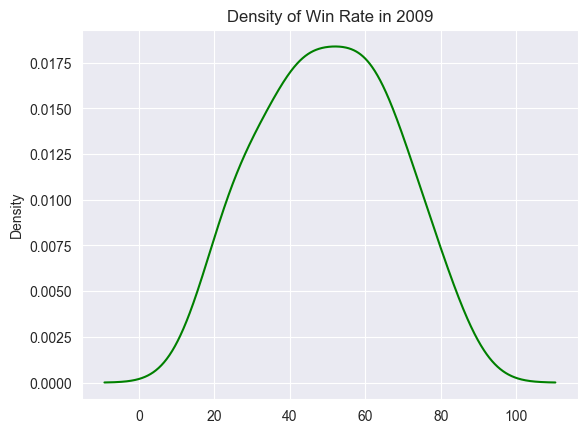

In [63]:
import matplotlib.pyplot as plt

temp_df = new_data.loc[new_data["Year"] == 2009]
temp_df["W/L%"].plot.density(color='green')
plt.title('Density of Win Rate in 2009')
plt.show()

Dengan melihat evaluasi di atas, didapatkan lah bahwa 2009 memiliki tahun yang paling kompetitif karena dengan melihat persebaran nilai win rate dengan menggunakan skewnessnya

## 1e. Menentukan golden age seorang pemain

In [64]:
lst_column_temp_player = players_df.columns

for i in lst_column_temp_player :
    if i != "Tm" and i != "Rk" and i != "Player" and i != "Pos":
        players_df[i] = pd.to_numeric(players_df[i], errors='coerce')

Referensi game score : https://www.basketball-reference.com/about/glossary.html#pts


In [65]:
players_df["Avg GameScore"] = players_df["PTS"] + (0.4 * players_df["FG"]) - (0.7 * players_df["FGA"]) - (0.4*(players_df["FTA"] - players_df["FT"])) + (0.7 * players_df["ORB"]) + (0.3 * players_df["DRB"]) + players_df["STL"] + (0.7* players_df["AST"]) + (0.7* players_df["BLK"]) - (0.4* players_df["PF"]) - players_df["TOV"]

In [66]:
avg_age_and_gamescore = players_df.groupby("Age")["Avg GameScore"].mean().reset_index()

display(avg_age_and_gamescore[avg_age_and_gamescore["Avg GameScore"] == avg_age_and_gamescore["Avg GameScore"].max()])

,Age,Avg GameScore
10,28,6.945052


Dengan mempertimbangkan nilai Gamescorenya, umur golden age adalah 28 tahun dengan melihat rata-rata gamescore terbesar

## 1f. Apakah gamescore dari pemain mempengaruhi harga pemain di tahun berikutnya

Pertama, kami mencoba untuk mencari korelasi gamescore pemain pada tahun 2018 dengan gaji pada tahun 2019

In [67]:
import seaborn as sns

temp_player_2018 = players_df.loc[players_df['Year'] == 2018]
temp_salaries_2019 = salaries_df.loc[salaries_df['Year'] == 2019]

temp_player_2018 = temp_player_2018.loc[:, ['Player', 'Avg GameScore']]
temp_salaries_2019 = temp_salaries_2019.loc[:, ['Name', 'Salaries']]

temp_salaries_2019.rename(columns={'Name' : 'Player'}, inplace=True)

data_2019 = pd.merge(temp_player_2018, temp_salaries_2019, on=["Player"])
data_2019 = data_2019.loc[:, ['Avg GameScore', 'Salaries']]
data_2019 = data_2019.sort_values(by='Salaries')
display(data_2019.corr())


,Avg GameScore,Salaries
Avg GameScore,1.000000,0.701726
Salaries,0.701726,1.000000


Dengan melihat hasil korelasi, yaitu 70% maka terdapat hubungan antara avg gamescore dan salaries. Namun, untuk membuktikan hal tersebut kita membuktikan dengan membandingkan data gamescore pemain pada tahun 2017 dengan gaji pada tahun 2018

In [68]:
temp_player_2017 = players_df.loc[players_df['Year'] == 2017]
temp_salaries_2018 = salaries_df.loc[salaries_df['Year'] == 2018]

temp_player_2017 = temp_player_2017.loc[:, ['Player', 'Avg GameScore']]
temp_salaries_2018 = temp_salaries_2018.loc[:, ['Name', 'Salaries']]

temp_salaries_2018.rename(columns={'Name' : 'Player'}, inplace=True)

temp = temp_salaries_2018.loc[temp_salaries_2018['Player'] == 'Mahmoud Abdul-Rauf']

display(temp.head())
display(temp_player_2017.head())

display(temp_salaries_2018.head())

data_2018 = pd.merge(temp_player_2017, temp_salaries_2018, on=["Player"])
data_2018 = data_2018.loc[:, ['Avg GameScore', 'Salaries']]
data_2018 = data_2018.sort_values(by='Salaries')
display(data_2018.corr())

,Player,Salaries
34038,Mahmoud Abdul-Rauf,2500000.0


,Player,Avg GameScore
14598,Álex Abrines,3.58
14599,Quincy Acy,4.02
14600,Quincy Acy,0.09
14601,Quincy Acy,4.85
14602,Steven Adams,10.48


,Player,Salaries
33678,Shaquille O'Neal,2500000.0
33679,Kevin Garnett,2500000.0
33680,Alonzo Mourning,2500000.0
33681,Juwan Howard,2500000.0
33682,Scottie Pippen,2500000.0


,Avg GameScore,Salaries
Avg GameScore,1.000000,0.762129
Salaries,0.762129,1.000000


Dengan melihat hasil korelasi, yaitu 76% maka terdapat hubungan antara avg gamescore pada 2017 dengan salaries di 2018. Dengan demikian, kita dapat menyimpulkan bahwa gamescore pemain pada tahun sebelumnya mempengaruhi salaries di tahun saat ini

C:\Users\imman\AppData\Local\Temp\ipykernel_17868\529209170.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'Year' : i, 'Percentage' : corr.loc['Avg GameScore', 'Salaries']}, ignore_index=True)
C:\Users\imman\AppData\Local\Temp\ipykernel_17868\529209170.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'Year' : i, 'Percentage' : corr.loc['Avg GameScore', 'Salaries']}, ignore_index=True)
C:\Users\imman\AppData\Local\Temp\ipykernel_17868\529209170.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'Year' : i, 'Percentage' : corr.loc['Avg GameScore', 'Salaries']}, ignore_index=True)
C:\Users\imman\AppData\Local\Temp\ipykernel_17868\529209170.py:1

<AxesSubplot: xlabel='Year'>

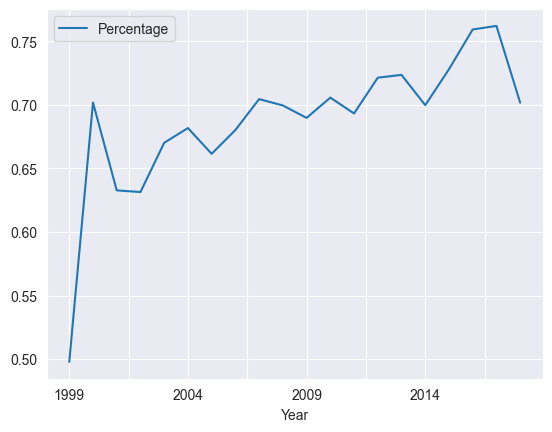

In [69]:
new_df = pd.DataFrame.from_dict({'Year' : [], 'Percentage' : []})

for i in range(1999, 2019) :
    temp_player = players_df.loc[players_df['Year'] == i]
    temp_salaries = salaries_df.loc[salaries_df['Year'] == i+1]

    temp_player = temp_player.loc[:, ['Player', 'Avg GameScore']]
    temp_salaries = temp_salaries.loc[:, ['Name', 'Salaries']]

    temp_salaries.rename(columns={'Name' : 'Player'}, inplace=True)

    data_x = pd.merge(temp_player, temp_salaries, on=["Player"])
    data_x = data_x.loc[:, ['Avg GameScore', 'Salaries']]
    data_x = data_x.sort_values(by='Salaries')
    corr = data_x.corr()
    new_df = new_df.append({'Year' : i, 'Percentage' : corr.loc['Avg GameScore', 'Salaries']}, ignore_index=True)

new_df = new_df.astype({"Year":'int64'})
new_df = new_df.astype({"Year":'category'})

axes = plt.gca()
new_df.set_index('Year', inplace=True)
new_df.plot(kind="line", y="Percentage", ax=axes)

Berikut merupakan grafik korelasi antara hubungan performa pemain pada tahun X dengan gaji pada tahun berikutnya

# 2A. Prediksi Position


In [70]:
import numpy as np
import pandas as pd

from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [71]:
players_df = pd.read_csv("datasets/players.csv",";")
data_df = pd.read_csv("datasets/all_seasons.csv")

C:\Users\imman\AppData\Local\Temp\ipykernel_17868\1824939329.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  players_df = pd.read_csv("datasets/players.csv",";")


## Preprocessing data dan menggabungkan sebuah dataset lain

In [72]:
display(players_df)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,2,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,15.1,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,3,Mark Acres,C,28,ORL,68,0,19.3,1.6,3.1,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,4,Michael Adams,PG,28,DEN,66,66,35.5,8.5,21.5,...,0.9,3,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,5,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,11.7,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18039,536,Delon Wright,PG,28,SAC,27,8,25.8,3.9,8.3,...,1,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10,2021
18040,537,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,9.7,...,2.5,3.8,6.2,4.3,1.1,0.6,2,2.2,12.1,2021
18041,538,Trae Young,PG,22,ATL,63,63,33.7,7.7,17.7,...,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,2021
18042,539,Cody Zeller,C,28,CHO,48,21,20.9,3.8,6.8,...,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,2021


In [73]:
data_df.rename(columns = {'player_name':'Player', 'season':'Year'}, inplace = True)
data_df["Year"] = data_df["Year"].str[:4]



data_df = data_df.loc[:,["Player", "Year", "player_height", "player_weight"]]

display(data_df)

,Player,Year,player_height,player_weight
0,Dennis Rodman,1996,198.12,99.790240
1,Dwayne Schintzius,1996,215.90,117.933920
2,Earl Cureton,1996,205.74,95.254320
3,Ed O'Bannon,1996,203.20,100.697424
4,Ed Pinckney,1996,205.74,108.862080
...,...,...,...,...
11140,Maxi Kleber,2019,208.28,108.862080
11141,Melvin Frazier Jr.,2019,195.58,97.522280
11142,Meyers Leonard,2019,213.36,117.933920
11143,Norvel Pelle,2019,208.28,104.779752


In [74]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18044 entries, 0 to 18043
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rk      18044 non-null  object
 1   Player  18044 non-null  object
 2   Pos     18044 non-null  object
 3   Age     18044 non-null  object
 4   Tm      18044 non-null  object
 5   G       18044 non-null  object
 6   GS      18044 non-null  object
 7   MP      18044 non-null  object
 8   FG      18044 non-null  object
 9   FGA     18044 non-null  object
 10  FG%     18044 non-null  object
 11  3P      18044 non-null  object
 12  3PA     18044 non-null  object
 13  3P%     18044 non-null  object
 14  2P      18044 non-null  object
 15  2PA     18044 non-null  object
 16  2P%     18044 non-null  object
 17  eFG%    18044 non-null  object
 18  FT      18044 non-null  object
 19  FTA     18044 non-null  object
 20  FT%     18044 non-null  object
 21  ORB     18044 non-null  object
 22  DRB     18044 non-null

In [75]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11145 entries, 0 to 11144
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         11145 non-null  object 
 1   Year           11145 non-null  object 
 2   player_height  11145 non-null  float64
 3   player_weight  11145 non-null  float64
dtypes: float64(2), object(2)
memory usage: 348.4+ KB


In [76]:
print("Jumlah duplikasi data pada dataset mvps:", players_df.duplicated().sum(), "maka lakukan drop data terlebih dahulu")

players_df = players_df.drop_duplicates(inplace = False)
print("Jumlah duplikasi data setelah drop duplikasinya:", players_df.duplicated().sum())

Jumlah duplikasi data pada dataset mvps: 627 maka lakukan drop data terlebih dahulu
Jumlah duplikasi data setelah drop duplikasinya: 0


In [77]:
players_df.drop(players_df.index[players_df['Rk'] == 'Rk'], inplace = True)

In [78]:
data_df["Year"] = pd.to_numeric(data_df["Year"])

In [79]:
players_df = pd.merge(data_df, players_df, on=["Player", "Year"])

display(players_df)

,Player,Year,player_height,player_weight,Rk,Pos,Age,Tm,G,GS,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Dwayne Schintzius,1996,215.90,117.933920,342,C,27,IND,33,8,...,619,0.7,1.7,2.4,0.4,0.3,0.4,0.6,1.6,3.4
1,Ed O'Bannon,1996,203.20,100.697424,272,SG,23,NJN,64,29,...,713,1,1.6,2.6,1,0.7,0.2,1,1.5,6.2
2,Ed Pinckney,1996,205.74,108.862080,296,PF,32,TOT,74,47,...,0.76,2.6,3.6,6.2,1,0.9,0.4,1,2.1,6.5
3,Ed Pinckney,1996,205.74,108.862080,296,PF,32,TOR,47,24,...,758,2.4,3.6,6,1.1,0.7,0.4,1.1,2.1,7
4,Ed Pinckney,1996,205.74,108.862080,296,PF,32,PHI,27,23,...,764,2.7,3.8,6.5,0.8,1.2,0.4,0.9,2,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9782,Matthew Dellavedova,2019,190.50,90.718400,133,PG,28,MIL,12,0,...,1,0,0.8,0.8,2.4,0.2,0,0.9,0.8,1.7
9783,Matthew Dellavedova,2019,190.50,90.718400,133,PG,28,CLE,36,0,...,792,0.2,1.7,1.9,4.2,0.3,0.1,1.6,1.8,7.3
9784,Maurice Harkless,2019,200.66,99.790240,208,SF,25,POR,60,53,...,671,1.3,3.2,4.5,1.2,1.1,0.9,0.8,2.7,7.7
9785,Maxi Kleber,2019,208.28,108.862080,283,PF,27,DAL,71,18,...,784,1.3,3.4,4.6,1,0.5,1.1,0.8,2,6.8


## Pemisahan kolom-kolom menjadi feature (X) dan target (y) dan drop fitur-fitur yang tidak diperlukan

In [80]:
players_df = players_df.drop(["Rk", "Player", "Tm", "Year"], axis=1)

display(players_df.columns)

lst_column = players_df.columns

for i in lst_column : 
    if i != "Pos":
        players_df[i] = pd.to_numeric(players_df[i])

display(players_df.info())

lst_pos = players_df["Pos"].unique()

Index(['player_height', 'player_weight', 'Pos', 'Age', 'G', 'GS', 'MP', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9787 entries, 0 to 9786
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   player_height  9787 non-null   float64
 1   player_weight  9787 non-null   float64
 2   Pos            9787 non-null   object 
 3   Age            9787 non-null   int64  
 4   G              9787 non-null   int64  
 5   GS             9787 non-null   int64  
 6   MP             9787 non-null   float64
 7   FG             9787 non-null   float64
 8   FGA            9787 non-null   float64
 9   FG%            9787 non-null   float64
 10  3P             9787 non-null   float64
 11  3PA            9787 non-null   float64
 12  3P%            9787 non-null   float64
 13  2P             9787 non-null   float64
 14  2PA            9787 non-null   float64
 15  2P%            9787 non-null   float64
 16  eFG%           9787 non-null   float64
 17  FT             9787 non-null   float64
 18  FTA     

None

In [81]:
players_df = players_df.loc[(players_df["Pos"] == "SG") | (players_df["Pos"] == "PG") | (players_df["Pos"] == "SF") | (players_df["Pos"] == "PF")| (players_df["Pos"] == "C")]

display(players_df["Pos"].unique())



array(['C', 'SG', 'PF', 'SF', 'PG'], dtype=object)

In [82]:
players_df["Pos"] = players_df["Pos"].replace(['PF', 'PG', 'C', 'SF', 'SG'], [0,1,2,3,4])

display(players_df)


players_df["Pos"] = pd.to_numeric(players_df["Pos"])

,player_height,player_weight,Pos,Age,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,215.90,117.933920,2,27,33,8,9.0,1.5,3.3,445.00,...,619.00,0.7,1.7,2.4,0.4,0.3,0.4,0.6,1.6,3.4
1,203.20,100.697424,4,23,64,29,19.6,2.4,6.3,0.39,...,713.00,1.0,1.6,2.6,1.0,0.7,0.2,1.0,1.5,6.2
2,205.74,108.862080,0,32,74,47,23.1,2.3,4.5,0.51,...,0.76,2.6,3.6,6.2,1.0,0.9,0.4,1.0,2.1,6.5
3,205.74,108.862080,0,32,47,24,21.9,2.5,5.0,502.00,...,758.00,2.4,3.6,6.0,1.1,0.7,0.4,1.1,2.1,7.0
4,205.74,108.862080,0,32,27,23,25.1,2.0,3.8,529.00,...,764.00,2.7,3.8,6.5,0.8,1.2,0.4,0.9,2.0,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9782,190.50,90.718400,1,28,12,0,8.1,0.5,1.6,316.00,...,1.00,0.0,0.8,0.8,2.4,0.2,0.0,0.9,0.8,1.7
9783,190.50,90.718400,1,28,36,0,19.9,2.6,6.2,413.00,...,792.00,0.2,1.7,1.9,4.2,0.3,0.1,1.6,1.8,7.3
9784,200.66,99.790240,3,25,60,53,23.6,3.2,6.5,487.00,...,671.00,1.3,3.2,4.5,1.2,1.1,0.9,0.8,2.7,7.7
9785,208.28,108.862080,0,27,71,18,21.2,2.5,5.4,453.00,...,784.00,1.3,3.4,4.6,1.0,0.5,1.1,0.8,2.0,6.8


In [83]:
X = players_df.drop('Pos', axis=1)
y = players_df['Pos'].to_frame()



In [84]:
from sklearn.model_selection import train_test_split

# Membagi dataset menjadi training set dan test set
# dengan jumlah test set adalah sebanyak 5% dari data keseluruhan 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [85]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Membagi dataset train menjadi training set dan test set
# dengan jumlah test set adalah sebanyak 20% dari data keseluruhan 

X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import joblib

# define the models and the parameter grids
models = [
    RandomForestClassifier(random_state=42),
    LogisticRegression(random_state=42),
    SVC(random_state=42),
    MLPClassifier(random_state=42),
    KNeighborsClassifier(),
    GaussianNB(),
]
param_grids = [{
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
},
    {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']},
    {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    {'hidden_layer_sizes': [(10,), (50,), (100,)], 'learning_rate_init': [0.1, 0.01, 0.001], 'activation' : ['relu', 'logistic']},
    {'n_neighbors': [1,2,3,4,5, 6, 7, 8, 9], 'metric': ['euclidean', 'manhattan']},
    {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}]


In [87]:
def perform_grid_search_2a():
    # create the grid search objects
    grid_searches = []
    for model, param_grid in zip(models, param_grids):
        grid_search = GridSearchCV(model, param_grid, cv=5)
        grid_searches.append(grid_search)

    # fit the grid search objects to the training data
    for grid_search in grid_searches:
        grid_search.fit(X_train_temp, y_train_temp)
    return grid_searches

In [88]:
file_name = 'grid_search_cv_2a.pkl'
try:
    grid_searches = joblib.load(file_name)
except FileNotFoundError:
    grid_searches = perform_grid_search_2a()
    joblib.dump(grid_searches, file_name)

In [89]:
# print the best parameters and the best scores for each model
for i, grid_search in enumerate(grid_searches):
    print(f"Model {i}:")
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best score: {grid_search.best_score_}")

# retrain the models with the best parameters on the entire training set
best_models = []
for grid_search in grid_searches:
    best_model = grid_search.best_estimator_
    best_model.fit(X_train_temp, y_train_temp)
    best_models.append(best_model)

# evaluate the models on the test set
for i, model in enumerate(best_models):
    test_score = model.score(X_test_temp, y_test_temp)
    print(f"Model {i}: Test score = {test_score}")


Model 0:
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best score: 0.7922392886014552
Model 1:
Best parameters: {'C': 10, 'penalty': 'l2'}
Best score: 0.7689571544058206
Model 2:
Best parameters: {'C': 10, 'kernel': 'linear'}
Best score: 0.7710590137429264
Model 3:
Best parameters: {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.01}
Best score: 0.7725141471301536
Model 4:
Best parameters: {'metric': 'manhattan', 'n_neighbors': 9}
Best score: 0.6596604688763137
Model 5:
Best parameters: {'var_smoothing': 0.0001}
Best score: 0.6674211802748585


C:\Users\imman\AppData\Local\Temp\ipykernel_17868\3503918894.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_model.fit(X_train_temp, y_train_temp)
H:\01 Kuliah\01 Dokumen\52 - KASDD\proyek-akhir\yang dikumpulin\venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
H:\01 Kuliah\01 Dokumen\52 - KASDD\proyek-akhir\yang dikumpulin\venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative

Model 0: Test score = 0.7821590174531351
Model 1: Test score = 0.7575953458306399
Model 2: Test score = 0.768584356819651
Model 3: Test score = 0.7608274078862314
Model 4: Test score = 0.649644473173885
Model 5: Test score = 0.6302521008403361


Dari GridCV diatas diketahui model terbaik adalah dengan menggunakan random forest dengan parameter {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}. Lalu kita uji dengan data test asli yang kita siapkan

In [90]:
# evaluate the models on the test set
for i, model in enumerate(best_models):
    if i == 0 :
        predicted = model.predict(X_test)

        # Menampilkan metrics
        print("Nilai rata-rata akurasi:", model.score(X_test, y_test))
        print('F1 Macro Average:', f1_score(y_test, predicted, average='macro'))
        print('F1 Micro Average:', f1_score(y_test, predicted, average='micro'))
        print('Precision Macro Average:', precision_score(y_test, predicted, average='macro',zero_division=0))
        print('Precision Micro Average:', precision_score(y_test, predicted, average='micro',zero_division=0))
        print('Recall Macro Average:', recall_score(y_test, predicted, average='macro',zero_division=0))
        print('Recall Micro Average:', recall_score(y_test, predicted, average='micro',zero_division=0))
        break



Nilai rata-rata akurasi: 0.7983453981385729
F1 Macro Average: 0.7976680569039052
F1 Micro Average: 0.7983453981385727
Precision Macro Average: 0.7977249596260563
Precision Micro Average: 0.7983453981385729
Recall Macro Average: 0.798011057891352
Recall Micro Average: 0.7983453981385729


Dengan demikian akurasi yang didapatkan pada final test adalah 80%

# 2B. Prediksi Salaries

In [91]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import time
import joblib
from sklearn.base import TransformerMixin, BaseEstimator, clone
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel, SelectKBest
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import Lasso
from sklearn.neighbors import NearestNeighbors, KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
import sklearn.preprocessing as preprocessing

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from pandas._libs.parsers import k
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold


random_state = 42

In [92]:
mvp_stats_2b = pd.read_csv("datasets/player_mvp_stats.csv", ';')
nicknames_df = pd.read_csv("datasets/nicknames.csv", ';')
salaries_2b = pd.read_csv("datasets/salaries.csv")
teams_2b = pd.read_csv("datasets/teams.csv", ';')

us_inflation_2b = pd.read_csv("datasets/US CPI.csv")

# us_inflation_2b source:
# https://www.kaggle.com/datasets/varpit94/us-inflation-data-updated-till-may-2021

C:\Users\imman\AppData\Local\Temp\ipykernel_17868\3205523321.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  mvp_stats_2b = pd.read_csv("datasets/player_mvp_stats.csv", ';')
C:\Users\imman\AppData\Local\Temp\ipykernel_17868\3205523321.py:2: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  nicknames_df = pd.read_csv("datasets/nicknames.csv", ';')
C:\Users\imman\AppData\Local\Temp\ipykernel_17868\3205523321.py:4: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  teams_2b = pd.read_csv("datasets/teams.csv", ';')


In [93]:
# rename kolom supaya namanya tidak misleading
salaries_2b.rename({"Rank": "Salaries_Rank"}, axis=1, inplace=True)

### 2B. Preprocess dan merge beberapa dataset menjadi satu

In [94]:
def dataframe_to_dict(nicknames_df, key_column_name='Name', value_column_name='Abbreviation'):
    keys = nicknames_df[key_column_name]
    values = nicknames_df[value_column_name]
    return dict(zip(keys, values))

In [95]:
def cleaning_teamsdf_removeUnimportantRows(teams_2b):
    teams_2b = teams_2b.copy()
    important_rows = ~teams_2b.W.str.contains("Division")
    return teams_2b[important_rows]

def cleaning_teamsdf_convertStripToNan(teams_2b):
    teams_2b = teams_2b.copy()
    teams_2b.GB = teams_2b.GB.replace("—", np.NAN)
    return teams_2b

def cleaning_teamsdf_convertToAppropriateDatatype(teams_2b):
    """
    preconditions:
        cleaning_teamsdf_removeUnimportantRows
         cleaning_teamsdf_convertStripToNan
    """
    teams_2b = teams_2b.copy()
    teams_2b.W = pd.to_numeric(teams_2b.W)
    teams_2b.L = pd.to_numeric(teams_2b.L)
    teams_2b['W/L%'] = pd.to_numeric(teams_2b['W/L%'])
    teams_2b.GB = pd.to_numeric(teams_2b.GB)
    teams_2b['PS/G'] = pd.to_numeric(teams_2b['PS/G'])
    teams_2b['PA/G'] = pd.to_numeric(teams_2b['PA/G'])
    teams_2b.SRS = pd.to_numeric(teams_2b.SRS)
    return teams_2b

def cleaning_anyDf_removeStarInTeamName(teams_2b, column_name='Team'):
    teams_2b = teams_2b.copy()
    teams_2b[column_name] = teams_2b[column_name].str.replace('*', '')
    return teams_2b


def cleaning_anyDf_convertTeamNamesToItsAbbrev(teams_2b, nicknames_df, column_name='Team'):
    """
    precondition:
        teams df:
            cleaning_anyDf_removeStarInTeamName
    """
    nicknames_df = nicknames_df.copy()
    teams_2b = teams_2b.copy()

    nicknames_df = nicknames_df.drop_duplicates(subset='Name', keep='first')
    mapping = dataframe_to_dict(nicknames_df)
    mapping |= dataframe_to_dict(nicknames_df, 'Abbreviation', 'Abbreviation')

    teams_2b[column_name] = list(map(
        lambda x: mapping[x],
        teams_2b[column_name]
    ))
    return teams_2b

In [96]:
teams_2b = cleaning_teamsdf_removeUnimportantRows(teams_2b)
teams_2b = cleaning_teamsdf_convertStripToNan(teams_2b)
teams_2b = cleaning_teamsdf_convertToAppropriateDatatype(teams_2b)
teams_2b = cleaning_anyDf_removeStarInTeamName(teams_2b)
teams_2b = cleaning_anyDf_convertTeamNamesToItsAbbrev(teams_2b, nicknames_df)
teams_2b

C:\Users\imman\AppData\Local\Temp\ipykernel_17868\1280597476.py:29: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  teams_2b[column_name] = teams_2b[column_name].str.replace('*', '')


,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,56,26,683.0,NaN,111.5,105.7,5.22,1991,BOS
1,44,38,537.0,12.0,105.4,105.6,-0.39,1991,PHI
2,39,43,476.0,17.0,103.1,103.3,-0.43,1991,NYK
3,30,52,366.0,26.0,101.4,106.4,-4.84,1991,WSB
4,26,56,317.0,30.0,102.9,107.5,-4.53,1991,NJN
...,...,...,...,...,...,...,...,...,...
1028,42,30,583.0,NaN,112.4,110.2,2.26,2021,DAL
1029,38,34,528.0,4.0,113.3,112.3,1.07,2021,MEM
1030,33,39,458.0,9.0,111.1,112.8,-1.58,2021,SAS
1031,31,41,431.0,11.0,114.6,114.9,-0.20,2021,NOP


In [97]:
from datetime import datetime


def cleaning_inflationDf_separateDateColumns(us_inflation_2b, column='Yearmon', format="%d-%m-%Y"):
    us_inflation_2b = us_inflation_2b.copy()

    dates = []
    for i in range(len(us_inflation_2b)):
        date = us_inflation_2b[column].iloc[i]
        date = datetime.strptime(date, format)
        dates.append(date)
    us_inflation_2b['Year']  = [date.year for date in dates]
    us_inflation_2b['Month'] = [date.month for date in dates]
    us_inflation_2b['Day']   = [date.day for date in dates]

    return us_inflation_2b


def cleaning_inflationDf_getYearByMedian(us_inflation_2b):
    """
    precondition: cleaning_inflationDf_separateDateColumns
    """
    us_inflation_2b = us_inflation_2b.copy()
    us_inflation_2b = cleaning_inflationDf_separateDateColumns(us_inflation_2b)
    us_inflation_2b = us_inflation_2b.groupby(by='Year')['CPI'].median()
    us_inflation_2b = us_inflation_2b.reset_index()
    return us_inflation_2b


def cleaning_anyDf_removeDuplicatedColumns(combined_df):
    combined_df = combined_df.copy()
    columns = combined_df.columns

    columns_tobe_removed = []
    for i in range(len(columns)):
        col1 = columns[i]
        for j in range(i+1, len(columns)):
            col2 = columns[j]

            if (combined_df[col1] == combined_df[col2]).all():
                columns_tobe_removed.append(col1)
    columns_tobe_kept = set(combined_df.columns) - set(columns_tobe_removed)
    columns_tobe_kept = list(columns_tobe_kept)
    return combined_df.loc[:, columns_tobe_kept]

def cleaning_anyDf_recalculateWLpercentage(teams_2b):
    """
    Nilai W/L% pada dataset CSV banyak yang ambigu dan kurang konsisten. Jadi lebih baik dihitung ulang saja.
    """
    teams_2b = teams_2b.copy()
    teams_2b['W/L%'] = 100*teams_2b.W / (teams_2b.W + teams_2b.L)
    return teams_2b

In [98]:
us_inflation_2b.head()

,Yearmon,CPI
0,01-01-1913,9.8
1,01-02-1913,9.8
2,01-03-1913,9.8
3,01-04-1913,9.8
4,01-05-1913,9.7


In [99]:
cleaning_inflationDf_getYearByMedian(cleaning_inflationDf_separateDateColumns(us_inflation_2b))

,Year,CPI
0,1913,9.8500
1,1914,10.0000
2,1915,10.1000
3,1916,10.8000
4,1917,12.9000
...,...,...
104,2017,244.8705
105,2018,251.7885
106,2019,256.3505
107,2020,258.8895


Pada kasus ini kami memutuskan mengambil median dari inflasi karena CPI merupakan perbandingan inflasi pada tahun ini dengan inflasi pada suatu tahun yang dijadikan pivot. Karena CPI merupakan suatu perbandingan, maka kami merasa bahwa mengambil median lebih tepat dibandingkan mengambil mean-nya.

In [100]:
us_inflation_2b_cleaned = us_inflation_2b.copy()
us_inflation_2b_cleaned = cleaning_inflationDf_separateDateColumns(us_inflation_2b_cleaned)
us_inflation_2b_cleaned = cleaning_inflationDf_getYearByMedian(us_inflation_2b_cleaned)

In [101]:
combined_df = us_inflation_2b_cleaned.merge(teams_2b, left_on=["Year"], right_on=["Year"])
combined_df = cleaning_anyDf_recalculateWLpercentage(combined_df)
combined_df.head(3)

,Year,CPI,W,L,W/L%,GB,PS/G,PA/G,SRS,Team
0,1991,136.1,56,26,68.292683,NaN,111.5,105.7,5.22,BOS
1,1991,136.1,44,38,53.658537,12.0,105.4,105.6,-0.39,PHI
2,1991,136.1,39,43,47.560976,17.0,103.1,103.3,-0.43,NYK


In [102]:
mvp_stats_2b = mvp_stats_2b.drop('Tm', axis=1)  # karena sudah ada kolom Team
mvp_stats_2b = cleaning_anyDf_convertTeamNamesToItsAbbrev(mvp_stats_2b, nicknames_df)

In [103]:
display(mvp_stats_2b.head(2))
display(combined_df.head(2))
print('banyaknya null salaries: ', salaries_2b.Salaries.isna().sum())
print('banyaknya null player name salaries: ', salaries_2b.Name.isna().sum())
print('banyaknya null player name mvp stats: ', mvp_stats_2b.Player.isna().sum())
print('banyaknya null team name: ', combined_df.Team.isna().sum())
print()
print('banyaknya row salaries df : ', len(salaries_2b))
print('banyaknya row mvp statsdf : ', len(mvp_stats_2b))
print('banyaknya row combined df : ', len(combined_df))

,Player,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,27,82,21,26.4,3.1,6.6,476.0,0.1,...,0,0.0,LAL,58,24,707.0,5.0,106.3,99.6,6.73
1,Byron Scott,SG,29,82,82,32.1,6.1,12.8,477.0,0.9,...,0,0.0,LAL,58,24,707.0,5.0,106.3,99.6,6.73


,Year,CPI,W,L,W/L%,GB,PS/G,PA/G,SRS,Team
0,1991,136.1,56,26,68.292683,NaN,111.5,105.7,5.22,BOS
1,1991,136.1,44,38,53.658537,12.0,105.4,105.6,-0.39,PHI


banyaknya null salaries:  28074
banyaknya null player name salaries:  0
banyaknya null player name mvp stats:  0
banyaknya null team name:  0

banyaknya row salaries df :  37420
banyaknya row mvp statsdf :  14092
banyaknya row combined df :  906


In [104]:
salaries_2b = salaries_2b.drop("Unnamed: 0", axis=1)

combined_df = mvp_stats_2b.merge(combined_df, left_on=["Team", "Year"], right_on=["Team", "Year"])
combined_df = salaries_2b.merge(combined_df, left_on=["Name", "Year"], right_on=["Player", "Year"])
combined_df = cleaning_anyDf_removeDuplicatedColumns(combined_df)

combined_df.head(5)

,eFG%,W/L%_x,Salaries,AST,DRB,FT%,PTS,GS,Pos,TRB,...,W/L%_y,2PA,Salaries_Rank,3PA,2P%,FT,FG,FTA,FGA,GB_x
0,574.0,817.00,17142000.0,3.8,9.4,524.0,29.7,79,C,13.6,...,81.707317,21.1,1,0.0,575.0,5.5,12.1,10.4,21.1,0.0
1,507.0,0.61,16806000.0,5.0,9.0,765.0,22.9,81,PF,11.8,...,60.975610,17.8,2,1.0,504.0,3.8,9.4,5.0,18.8,5.0
2,551.0,634.00,15004000.0,1.6,6.8,711.0,21.7,78,C,9.5,...,63.414634,14.9,3,0.1,553.0,5.2,8.3,7.4,15.0,0.0
3,459.0,354.00,15000000.0,3.0,4.1,735.0,14.9,82,PF,5.7,...,35.365854,13.4,4,0.1,462.0,2.5,6.2,3.4,13.5,23.0
4,501.0,0.72,14795000.0,5.0,4.9,717.0,12.5,82,SF,6.3,...,71.951220,7.3,5,3.2,506.0,2.0,4.7,2.7,10.5,8.0


In [105]:
print("Banyaknya data duplikat: ", combined_df.duplicated().sum())

Banyaknya data duplikat:  0


In [106]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8323 entries, 0 to 8322
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   eFG%           8296 non-null   float64
 1   W/L%_x         8323 non-null   float64
 2   Salaries       7933 non-null   float64
 3   AST            8323 non-null   float64
 4   DRB            8323 non-null   float64
 5   FT%            8066 non-null   float64
 6   PTS            8323 non-null   float64
 7   GS             8323 non-null   int64  
 8   Pos            8323 non-null   object 
 9   TRB            8323 non-null   float64
 10  Share          8323 non-null   float64
 11  TOV            8323 non-null   float64
 12  L_y            8323 non-null   int64  
 13  PS/G_y         8323 non-null   float64
 14  SRS_y          8323 non-null   float64
 15  2P             8323 non-null   float64
 16  FG%            8296 non-null   float64
 17  ORB            8323 non-null   float64
 18  GB_y    

### 2B. Visualisasi Data

In [107]:
pca = PCA(n_components=3)

scaler = MinMaxScaler()
temp_df = combined_df.drop(["Team", "Player", "Pos"], axis=1).dropna()
temp_df = pd.DataFrame(
    scaler.fit_transform(temp_df),
    columns=temp_df.columns
)
transformed_pca = pca.fit_transform(X=temp_df)
transformed_pca = pd.DataFrame(transformed_pca)

print("Cumulative sum of explained ratio: ")
print(np.cumsum(pca.explained_variance_ratio_))

Cumulative sum of explained ratio: 
[0.28649406 0.44685396 0.5775146 ]


Text(0.5, 1.0, 'Scatterplot antara PCA-0 dengan Salaries')

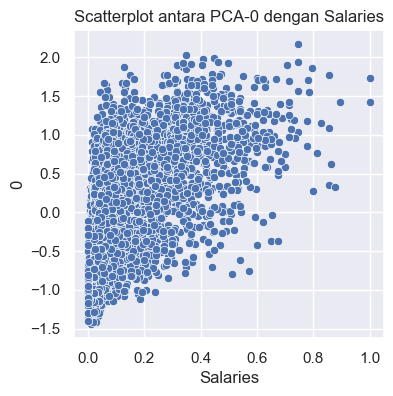

In [108]:
sns.set(rc={'figure.figsize':(4,4)})
sns.scatterplot(x=temp_df.Salaries, y=transformed_pca[0])
plt.title("Scatterplot antara PCA-0 dengan Salaries")

Text(0.5, 1.0, 'Scatterplot antara PCA-1 dengan Salaries')

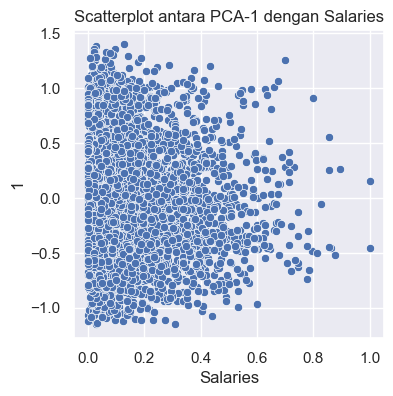

In [109]:
sns.scatterplot(x=temp_df.Salaries, y=transformed_pca[1])
plt.title("Scatterplot antara PCA-1 dengan Salaries")

Text(0.5, 1.0, 'Scatterplot antara PCA-2 dengan Salaries')

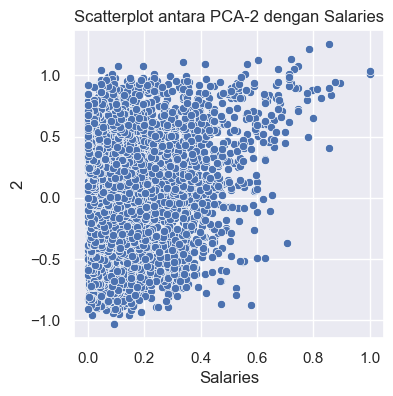

In [110]:
sns.scatterplot(x=temp_df.Salaries, y=transformed_pca[2])
plt.title("Scatterplot antara PCA-2 dengan Salaries")

In [111]:
correlation_target_and_pca = transformed_pca.apply(lambda x: x.corr(temp_df.Salaries))
print("Correlation between PCA and Salaries:")
print(correlation_target_and_pca)

Correlation between PCA and Salaries:
0    0.600283
1   -0.069053
2    0.219501
dtype: float64


Text(0.5, 1.0, 'Besar korelasi (mutlak) masing-masing kolom dengan Salaries')

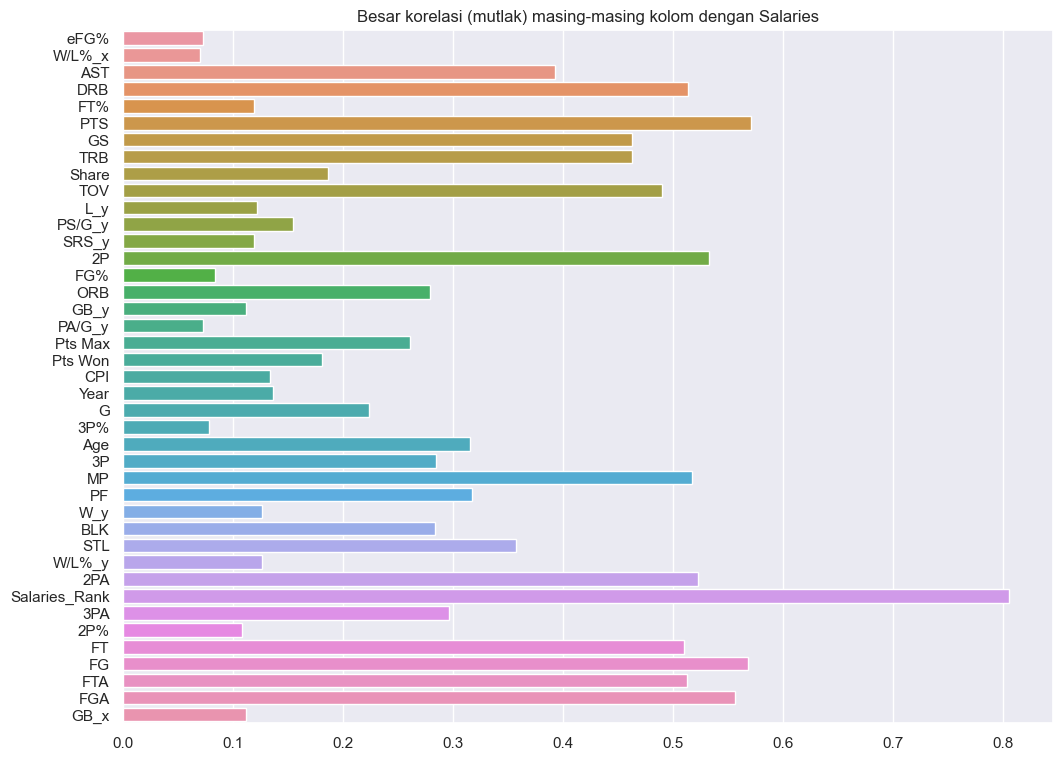

In [112]:
salaries = temp_df.Salaries
temp_df2 = temp_df.drop('Salaries', axis=1)
correlation_target_and_all_columns = temp_df2.apply(lambda x: x.corr(salaries))

sns.set(rc={'figure.figsize':(12,9)})
sns.barplot(y=temp_df2.columns, x=abs(correlation_target_and_all_columns), orient="h")
plt.title("Besar korelasi (mutlak) masing-masing kolom dengan Salaries")

### 2B. Drop missing values pada target feature

kami memutuskan untuk mendrop missing values pada target feature karena target feature merupakan ground truth. Oleh karena itu, kami tidak setuju apabila kita melakukan imputasi untuk missing values pada kolom ini. Sebab, apabila kita melakukan imputasi terhadap missing values untuk kolom ini, maka kolom ini tidak sepenuhnya menjadi ground truth lagi karena diisikan dengan data-data sintesis yang tidak diketahui kebenarannya.

In [113]:
print("Banyak missing values pada kolom Salaries sebelum drop: ", combined_df.Salaries.isna().sum())
combined_df = combined_df[combined_df.Salaries.notna()]
print("Banyak missing values pada kolom Salaries setelah drop: ", combined_df.Salaries.isna().sum())

Banyak missing values pada kolom Salaries sebelum drop:  390
Banyak missing values pada kolom Salaries setelah drop:  0


### 2B. Memisahkan kolom-kolom menjadi feature (X) dan target (y) dan drop fitur-fitur yang tidak diperlukan

Pada dataset ini, kita sudah memiliki gabungan seluruh feature mengenai statistik performa team dan statistik performa pemain. Oleh karena itu, nama tim dan nama pemain sudah tidak lagi berkaitan dengan gaji yang diperoleh. Nama tim sudah dapat digantikan dengan data mengenai performa tim, dan nama pemain dapat digantikan dengan data mengenai performa pemain.

Sementara itu, kita melakukan drop kolom Rank karena kolom tersebut merupakan Ranking gaji seorang pemain pada tahun itu. Oleh karena itu, kami merasa informasi ini tidak valid untuk dijadikan dasar dalam memprediksi gaji pemain.

In [114]:
x_2b, y_2b = combined_df.drop("Salaries", axis=1), combined_df[["Salaries"]]
x_2b.drop("Team", axis=1, inplace=True)
x_2b.drop("Player", axis=1, inplace=True)
x_2b.drop("Salaries_Rank", axis=1, inplace=True)

display(x_2b.head(2))
display(y_2b.head(2))

,eFG%,W/L%_x,AST,DRB,FT%,PTS,GS,Pos,TRB,Share,...,STL,W/L%_y,2PA,3PA,2P%,FT,FG,FTA,FGA,GB_x
0,574.0,817.00,3.8,9.4,524.0,29.7,79,C,13.6,998.0,...,0.5,81.707317,21.1,0.0,575.0,5.5,12.1,10.4,21.1,0.0
1,507.0,0.61,5.0,9.0,765.0,22.9,81,PF,11.8,337.0,...,1.5,60.975610,17.8,1.0,504.0,3.8,9.4,5.0,18.8,5.0


,Salaries
0,17142000.0
1,16806000.0


### 2B. Membagi dataset menjadi training, testing, dan final testing

Kami memutuskan untuk membagi dataset menjadi training, testing, dan final testing. Dataset final testing diperlukan karena kita sangat disarankan untuk memasuki fase testing hanya sekali saja, yakni ketika kita sudah benar-benar yakin dengan model yang kita bangun dan sudah tidak ingin mengutak-atik modelnya lagi. Oleh karena itu, kami memutuskan untuk membagi dataset testing menjadi testing untuk mengecek performa, dan final testing untuk model yang sudah final.

In [115]:
x_2b_train, x_2b_final_test, y_2b_train, y_2b_final_test = train_test_split(
    x_2b, y_2b, test_size=0.2, random_state=random_state
)
del x_2b
del y_2b

x_2b_train, x_2b_test, y_2b_train, y_2b_test = train_test_split(
    x_2b_train, y_2b_train, test_size=0.2, random_state=random_state,
)

### 2B. Pipeline Design, Training model, dan Hyperparameter tuning

Pada bagian ini, kita akan merancang pipeline mengenai alur pemrosesan data. Pipeline ini memiliki 5 tahapan: *encode* data kategorikal, menerapkan *scaling* & *standarisasi*, mengisi *missing values*, menerapkan *feature selection* , dan melakukan *training*/prediksi.

Beberapa tahapan dapat memiliki beberapa alternatif yang ingin dicoba. Misalnya, pada tahapan standarisasi kami mencoba metode MinMaxScaler, StandardScaler, RobustScaler, dan tanpa scaling. Setelah itu kami akan memilih metode yang menghasilkan akurasi terbaik. Oleh karena itu, kami akan memanfaatkan `GridSearchCV` untuk mencoba semua kombinasi tersebut.

Pada bagian ini, kami mempertimbangkan untuk tidak menghapus outlier karena kami mengasumsikan bahwa outlier pada dataset memang merupakan sifat alami dari data dan tidak diakibatkan oleh kesalahan pengukuran apapun. Karena outlier tersebut merupakan data alami, akan lebih baik apabila kami membiarkannya saja.

In [116]:
def cartesian_product_of_dict_lists(*multiple_list_of_dicts):
    if len(multiple_list_of_dicts) == 0:
        return []

    if len(multiple_list_of_dicts) == 1:
        return multiple_list_of_dicts[0]

    if len(multiple_list_of_dicts) == 2:
        ret = []
        for dict1 in multiple_list_of_dicts[0]:
            for dict2 in multiple_list_of_dicts[1]:
                ret.append(dict(**dict1, **dict2))
        return ret

    curr = [{}]
    for dct in multiple_list_of_dicts:
        curr = cartesian_product_of_dict_lists(curr, dct)
    return curr

In [117]:
class DataFrameCaptor(TransformerMixin):
    """Untuk mendapatkan contoh dataframe pada tahap tertentu di dalam pipeline"""
    def __init__(self):
        self.captured_fit_x = None
        self.captured_fit_y = None
        self.captured_transform_x = None
        self.captured_transform_y = None

    def fit(self, x, y=0):
        self.captured_fit_x = x
        self.captured_fit_y = y
        return self

    def transform(self, x, y=0):
        self.captured_transform_x = x
        self.captured_transform_y = y
        return x

    def get_captured_fit(self):
        return self.captured_fit_x, self.captured_fit_y

    def get_captured_transform(self):
        return self.captured_transform_x, self.captured_transform_y

Kami membuat salah satu metode encoding fitur kategorikal, yakni one-hot encoding dengan sedikit modifikasi. Pada dataset yang kami miliki, terdapat fitur `Pos`, yakni posisi pemain basket. Seorang pemain dapat memiliki satu ataupun dua posisi yang berbeda. Oleh karena itu, kami memodifikasi supaya one-hot encoding bisa memiliki nilai non-zero pada lebih dari satu kolom. Tetapi perlu diperhatikan bahwa urutan berpengaruh, sehingga Pos='SF-SG' berbeda dengan Pos='SG-SF'. Oleh karena itu, kami memutuskan untuk memberikan bobot yang berbeda-beda. Contohnya:
- Untuk Pos='C', maka setelah encoding, kolom C akan bernilai 1 dan kolom lainnya 0.
- Untuk Pos='SF-SG', maka setelah encoding, kolom SF akan bernilai 2/3, SG bernilai 1/3, dan kolom lainnya 0.
- Untuk Pos='SG-SF', maka setelah encoding, kolom SG akan bernilai 2/3, SF bernilai 1/3, dan kolom lainnya 0.

Deklarasi class di bawah ini akan menjalankan algoritma encoding tersebut.

In [118]:
class OrderedMultiClassOneHotEncoder:
    def __init__(self, target_col="Pos",
                 base_classes=('C', 'PF', 'SF', 'PG', 'SG'),
                 separator="-"):
        self.target_col = target_col
        self.base_classes = base_classes
        self.separator = separator

    def fit(self, x, y=0):
        return self

    def _get_col_name(self, class_name):
        return f"{self.target_col}_{class_name}"

    def transform(self, x, y=0):
        column_values = x[self.target_col]
        x = x.drop(self.target_col, axis=1)
        for base_class in self.base_classes:
            x[self._get_col_name(base_class)] = 0

        for ind, val in enumerate(column_values):
            classes =  val.split(self.separator)
            weights = [i for i in range(len(classes), 0, -1)]  # len, len-1, len-2, ..., 2, 1
            sum_ = sum(weights)

            for class_, weight in zip(classes, weights):
                class_ = self._get_col_name(class_)
                col = x.columns.get_loc(class_)
                x.iloc[ind, col] = weight / sum_
        return x

Pada eksperimen sebelumnya, kami sudah mencoba membandingkan performa antara LabelEncoder dengan OrderedMultiClassOneHotEncoder. Hasilnya, OrderedMultiClassOneHotEncoder memberikan performa yang lebih baik dibandingkan LabelEncoder. Oleh karena itu, untuk menghemat biaya komputasi, kami memutuskan untuk menghapus LabelEncoder dari GridSearchCV.

In [119]:
label_encoder_params = [{
    'encoding': [
        OrderedMultiClassOneHotEncoder("Pos", ['C', 'PF', 'SF', 'PG', 'SG'], "-"),
    ]
}]

In [120]:
scaler1 = preprocessing.MinMaxScaler()
scaler2 = preprocessing.StandardScaler()
scaler3 = preprocessing.RobustScaler()

scaler_params = [{
    'scaler': [None, scaler1, scaler2, scaler3],
}]

In [121]:
imputer1 = SimpleImputer()
imputer2 = KNNImputer()

imputer_params = [{
    'imputer': [imputer2, imputer1],
}]

Berikut ini kami mempertimbangkan SelectKBest untuk k bernilai 6 dan 7. Jumlahnya fitur yang dipilih disarankan adalah sqrt(N); N=banyaknya fitur. Oleh karena itu kami mencoba 6 dan 7 sebagai nilai k karena N=45; sqrt(N) sekitar 6 atau 7.

Source: https://datascience.stackexchange.com/a/11480/141286

In [122]:
len(combined_df.columns)

45

In [123]:
feature_selector_params = [{
    'feature_selector': [None]
}, {
    'feature_selector': [SelectFromModel(estimator=Lasso())],
    'feature_selector__estimator__alpha': [0.01]
}, {
    'feature_selector': [SelectKBest()],
    'feature_selector__k': [6, 7],
}, {
    'feature_selector': [PCA()],
    'feature_selector__n_components': ['mle']
}]

Kami sudah mencoba GridSearcCV untuk membandingkan model KNeighborsRegressor, LinearRegression, MLPRegressor (relu & tanh), dan RandomForestRegressor. Hasilnya, urutan model mulai dari yang terbaik hingga yang terburuk adalah RandomForestRegressor, LinearRegression, KNeighborsRegressor, dan MLPRegressor.

Setelah itu, kami juga sudah membandingkan RandomForestRegressor dengan SVR, BaggingRegressor(SVR()), BaggingRegressor(LinearRegression()), dan BaggingRegressor(KNeighborsRegressor()). Hasilnya, RandomForestRegressor masih tetap memberikan prediksi yang terbaik.

Oleh karena itu, di antara model-model yang sudah dicoba tersebut, kami mempertimbangkan untuk hanya memasukkan model RandomForestRegressor ke dalam GridSearchCV supaya menghemat biaya komputasi.

Setelah itu, kami mencoba RandomForestRegressor dengan min_samples_split 2 sampai 10. Hasilnya menunjukkan min_samples_split=5 memberikan akurasi terbaik. Oleh karena itu kami hanya akan mempertimbangkan min_samples_split=5 untuk dibandingkan dengan GradientBoostingRegressor

In [124]:
predictor_params = [{
    'predictor': [
        RandomForestRegressor(random_state=random_state),
    ],
    'predictor__min_samples_split': [5,],
}, {
    'predictor': [
        GradientBoostingRegressor(random_state=random_state),
    ],
    'predictor__n_estimators': [100, 110, 120, 130],
}]

In [125]:
pipeline = Pipeline(
    steps=[
        ('encoding', None),
        ('df_captor', DataFrameCaptor()),
        ('scaler', None),
        ('imputer', None),
        ('feature_selector', None),
        ('predictor', None),
    ]
)

In [126]:
grid_params = cartesian_product_of_dict_lists(
    label_encoder_params,
    scaler_params,
    imputer_params,
    feature_selector_params,
    predictor_params
)

In [127]:
grid_params

[{'encoding': [<__main__.OrderedMultiClassOneHotEncoder at 0x29554c7a3b0>],
  'scaler': [None, MinMaxScaler(), StandardScaler(), RobustScaler()],
  'imputer': [KNNImputer(), SimpleImputer()],
  'feature_selector': [None],
  'predictor': [RandomForestRegressor(random_state=42)],
  'predictor__min_samples_split': [5]},
 {'encoding': [<__main__.OrderedMultiClassOneHotEncoder at 0x29554c7a3b0>],
  'scaler': [None, MinMaxScaler(), StandardScaler(), RobustScaler()],
  'imputer': [KNNImputer(), SimpleImputer()],
  'feature_selector': [None],
  'predictor': [GradientBoostingRegressor(random_state=42)],
  'predictor__n_estimators': [100, 110, 120, 130]},
 {'encoding': [<__main__.OrderedMultiClassOneHotEncoder at 0x29554c7a3b0>],
  'scaler': [None, MinMaxScaler(), StandardScaler(), RobustScaler()],
  'imputer': [KNNImputer(), SimpleImputer()],
  'feature_selector': [SelectFromModel(estimator=Lasso())],
  'feature_selector__estimator__alpha': [0.01],
  'predictor': [RandomForestRegressor(random_s

In [128]:
def perform_grid_search_cv():
    grid_search_cv = GridSearchCV(
        estimator=pipeline,
        param_grid=grid_params,
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-2,
        verbose=10,
        error_score='raise',
    )

    grid_search_cv.fit(x_2b_train, y_2b_train.Salaries)
    return grid_search_cv

In [129]:
file_name_2b = "grid_search_cv_2b.pkl"
# Jika hasil GridSearchCV sudah tersimpan pada file, langsung dipakai saja. Jika belum, maka
# terapkan grid GridSearchCV
try:
    grid_search_cv = joblib.load(file_name_2b)
except FileNotFoundError:
    # sekitar 20 menit pada laptop i7  6 core  24 GB
    start = time.time()
    grid_search_cv = perform_grid_search_cv()
    stop = time.time()

    print(f"GridSearchCV time: {int(stop - start)} seconds")
    joblib.dump(grid_search_cv, file_name_2b)

In [130]:
# Get the scores for all hyperparameter combinations
cv_results = grid_search_cv.cv_results_
scores = []
for params_combination in cv_results['params']:
    score = cv_results['mean_test_score'][cv_results['params'].index(params_combination)]
    scores.append((score, params_combination))

# sort berdasarkan score terbesar (berdasarkan error yang terkecil)
scores.sort(reverse=True, key=lambda x: x[0])

print("Urutan parameter & model yang terbaik hingga terburuk: ")
print()
print()
# Print the scores for each combination
for score, params_combination in scores:
    print("Score: ", score)
    print(f"{params_combination}")
    print()

Urutan parameter & model yang terbaik hingga terburuk: 


Score:  -10129969214633.56
{'encoding': <__main__.OrderedMultiClassOneHotEncoder object at 0x0000029554E2E410>, 'feature_selector': None, 'imputer': KNNImputer(), 'predictor': GradientBoostingRegressor(n_estimators=110, random_state=42), 'predictor__n_estimators': 110, 'scaler': None}

Score:  -10129969214633.56
{'encoding': <__main__.OrderedMultiClassOneHotEncoder object at 0x0000029554E2E410>, 'feature_selector': SelectFromModel(estimator=Lasso()), 'feature_selector__estimator__alpha': 0.01, 'imputer': KNNImputer(), 'predictor': GradientBoostingRegressor(n_estimators=110, random_state=42), 'predictor__n_estimators': 110, 'scaler': None}

Score:  -10132068836361.816
{'encoding': <__main__.OrderedMultiClassOneHotEncoder object at 0x0000029554E2E410>, 'feature_selector': None, 'imputer': SimpleImputer(), 'predictor': GradientBoostingRegressor(n_estimators=110, random_state=42), 'predictor__n_estimators': 130, 'scaler': MinMaxScal

### 2B. Testing

In [131]:
def measure_accuracy(best_pipeline, x_test, y_test):
    best_pipeline.fit(x_2b_train, y_2b_train)
    y_predict = best_pipeline.predict(x_test)
    mae = metrics.mean_absolute_error(y_test, y_predict)

    r2 = metrics.r2_score(y_test, y_predict)
    salaries_mean = y_2b_test.Salaries.mean()

    print("R2 score: ", r2)
    print("Rata-rata error absolut: ", mae)
    print("Rata-rata error relatif: ", mae / salaries_mean)

In [132]:
best_pipeline = grid_search_cv.best_estimator_
measure_accuracy(best_pipeline, x_test=x_2b_test, y_test=y_2b_test)

H:\01 Kuliah\01 Dokumen\52 - KASDD\proyek-akhir\yang dikumpulin\venv\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2 score:  0.6475701155619731
Rata-rata error absolut:  2071717.7346250804
Rata-rata error relatif:  0.4497478052836038


In [133]:
best_pipeline

Pipeline(steps=[('encoding',
                 <__main__.OrderedMultiClassOneHotEncoder object at 0x0000029561642050>),
                ('df_captor',
                 <__main__.DataFrameCaptor object at 0x000002955A14BE80>),
                ('scaler', None), ('imputer', KNNImputer()),
                ('feature_selector', None),
                ('predictor',
                 GradientBoostingRegressor(n_estimators=110, random_state=42))])

In [134]:
grid_search_cv.best_params_

{'encoding': <__main__.OrderedMultiClassOneHotEncoder at 0x29554e2e410>,
 'feature_selector': None,
 'imputer': KNNImputer(),
 'predictor': GradientBoostingRegressor(n_estimators=110, random_state=42),
 'predictor__n_estimators': 110,
 'scaler': None}

Fitur-fitur yang terpilih

In [135]:
feature_selector = best_pipeline['feature_selector']
captured_df, *_ = best_pipeline['df_captor'].get_captured_fit()

if feature_selector is not None:
    print("Fitur-fitur terbaik: ")
    print()
    print(", ".join(
        feature_selector.get_feature_names_out(input_features=captured_df.columns)
    ))
else:
    print("Semua fitur terpilih:")
    print()
    print(", ".join(
        captured_df.columns
    ))

Semua fitur terpilih:

eFG%, W/L%_x, AST, DRB, FT%, PTS, GS, TRB, Share, TOV, L_y, PS/G_y, SRS_y, 2P, FG%, ORB, GB_y, PA/G_y, Pts Max, Pts Won, CPI, Year, G, 3P%, Age, 3P, MP, PF, W_y, BLK, STL, W/L%_y, 2PA, 3PA, 2P%, FT, FG, FTA, FGA, GB_x, Pos_C, Pos_PF, Pos_SF, Pos_PG, Pos_SG


### 2B. Final Testing

Setelah beberapa kali mencoba agar model menghasilkan akurasi tertinggi, kini kami sudah memiliki model yang final. Setelah kami memasuki tahap final testing untuk model ini, didapatkan R2 score-nya lebih tinggi dari testing pada bagian sebelumnya (testing yang bersifat non-final).

Berdasarkan final-testing ini, diperoleh sekitar:
- R2 score:  0.64
- Rata-rata error absolut:  2082025
- Rata-rata error relatif:  0.45

di mana error relatif merupakan rata-rata nilai error absolut dibagi dengan nilai rata-rata dari nilai yang seharusnya.

Dari hasil ini, dapat dilihat bahwa perbedaan error antara final-testing dan testing non-final relatif cukup rendah. Dengan begitu, dapat disimpulkan bahwa model yang kita miliki sudah cukup baik karena memiliki *error variance* yang rendah.

In [136]:
measure_accuracy(best_pipeline, x_2b_final_test, y_2b_final_test)

H:\01 Kuliah\01 Dokumen\52 - KASDD\proyek-akhir\yang dikumpulin\venv\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2 score:  0.641574880991687
Rata-rata error absolut:  2096390.9657594876
Rata-rata error relatif:  0.45510410038427923


# 2C. Clustering

In [137]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

In [138]:
pw_avg_gamescore_df = pd.read_csv("datasets/player_with_avg_gamescore.csv")
final_salaries_df = pd.read_csv("datasets/final_salaries.csv")

In [139]:
display(pw_avg_gamescore_df.columns)
display(pw_avg_gamescore_df.head())

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Avg GameScore'],
      dtype='object')

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Avg GameScore
0,1,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,...,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991,2.07
1,2,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,15.1,...,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991,7.23
2,3,Mark Acres,C,28,ORL,68,0,19.3,1.6,3.1,...,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991,3.98
3,4,Michael Adams,PG,28,DEN,66,66,35.5,8.5,21.5,...,3.0,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991,21.00
4,5,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,11.7,...,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991,9.28


In [140]:
display(final_salaries_df.columns)
display(final_salaries_df.head())

Index(['Name', 'Year', 'Salaries', 'Rank'], dtype='object')

,Name,Year,Salaries,Rank
0,Shaquille O'Neal,2000,25370160.0,1
1,Kevin Garnett,2000,24872880.0,2
2,Alonzo Mourning,2000,22205920.0,3
3,Juwan Howard,2000,22200000.0,4
4,Scottie Pippen,2000,21896600.0,5


In [141]:
# ambil player dari tahun 2000-2019
pw_avg_gamescore_df = pw_avg_gamescore_df.loc[(pw_avg_gamescore_df['Year'] >= 2000) & (pw_avg_gamescore_df['Year'] <= 2019)]

# merge player_with_avg_gamescore dan final_salaries
combined_data_df = pw_avg_gamescore_df.merge(final_salaries_df, left_on=["Player", "Year"], 
                                             right_on=["Name", "Year"])
combined_data_df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,STL,BLK,TOV,PF,PTS,Year,Avg GameScore,Name,Salaries,Rank
0,1,Tariq Abdul-Wahad,SG,25,TOT,61,56,25.9,4.5,10.6,...,1.0,0.5,1.7,2.4,11.4,2000,7.39,Tariq Abdul-Wahad,3700000.0,195
1,1,Tariq Abdul-Wahad,SG,25,ORL,46,46,26.2,4.8,11.2,...,1.2,0.3,1.9,2.5,12.2,2000,7.83,Tariq Abdul-Wahad,3700000.0,195
2,1,Tariq Abdul-Wahad,SG,25,DEN,15,10,24.9,3.4,8.7,...,0.4,0.8,1.3,2.1,8.9,2000,5.59,Tariq Abdul-Wahad,3700000.0,195
3,2,Shareef Abdur-Rahim,SF,23,VAN,82,82,39.3,7.2,15.6,...,1.1,1.1,3.0,3.0,20.3,2000,15.83,Shareef Abdur-Rahim,3700000.0,157
4,3,Cory Alexander,PG,26,DEN,29,2,11.3,1.0,3.4,...,0.8,0.1,1.0,1.3,2.8,2000,2.06,Cory Alexander,3700000.0,283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10310,528,Tyler Zeller,C,29,ATL,2,0,5.5,0.0,1.0,...,0.0,0.0,0.0,2.0,0.0,2019,0.15,Tyler Zeller,1933941.0,339
10311,528,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,...,0.3,0.8,1.0,4.0,11.5,2019,8.92,Tyler Zeller,1933941.0,339
10312,530,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,...,0.2,0.9,1.2,2.3,8.9,2019,7.77,Ivica Zubac,1544951.0,389
10313,530,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,...,0.1,0.8,1.0,2.2,8.5,2019,7.13,Ivica Zubac,1544951.0,389


## Normalisasi (MinMaxScaler)

In [142]:
df_copy = combined_data_df.drop("Player", axis=1)
df_copy = df_copy.drop("Name", axis=1)
df_copy = df_copy.drop("Tm", axis=1)
df_copy = df_copy.drop("Pos", axis=1)
df_copy = df_copy.drop("Age", axis=1)
df_copy = df_copy.drop("Year", axis=1)

scaler = MinMaxScaler()
scaler_transform = scaler.fit_transform(df_copy)

normalized_df = pd.DataFrame(scaler_transform, columns = df_copy.columns)
normalized_df["Pos"] = combined_data_df["Pos"]
normalized_df["Age"] = combined_data_df["Age"]
normalized_df["Year"] = combined_data_df["Year"]
normalized_df

,Rk,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,BLK,TOV,PF,PTS,Avg GameScore,Salaries,Rank,Pos,Age,Year
0,0.000000,0.714286,0.674699,0.592677,0.368852,0.381295,0.494749,0.000000,0.030303,0.000167,...,0.10,0.298246,0.400000,0.315789,0.353794,0.097292,0.103743,SG,25,2000
1,0.000000,0.535714,0.554217,0.599542,0.393443,0.402878,0.505251,0.000000,0.037879,0.122108,...,0.06,0.333333,0.416667,0.337950,0.368634,0.097292,0.103743,SG,25,2000
2,0.000000,0.166667,0.120482,0.569794,0.278689,0.312950,0.453909,0.019608,0.007576,0.000643,...,0.16,0.228070,0.350000,0.246537,0.293086,0.097292,0.103743,SG,25,2000
3,0.001855,0.964286,0.987952,0.899314,0.590164,0.561151,0.542590,0.078431,0.090909,0.388175,...,0.22,0.526316,0.500000,0.562327,0.638449,0.097292,0.083422,SF,23,2000
4,0.003711,0.333333,0.024096,0.258581,0.081967,0.122302,0.333722,0.058824,0.090909,0.330334,...,0.02,0.175439,0.216667,0.077562,0.174030,0.097292,0.150802,PG,26,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10310,0.977737,0.011905,0.000000,0.125858,0.000000,0.035971,0.000000,0.000000,0.037879,0.000000,...,0.00,0.000000,0.333333,0.000000,0.109612,0.050540,0.180749,C,29,2019
10311,0.977737,0.035714,0.012048,0.469108,0.327869,0.251799,0.666278,0.000000,0.000000,0.000000,...,0.16,0.175439,0.666667,0.318560,0.405396,0.050540,0.180749,C,29,2019
10312,0.981447,0.690476,0.445783,0.402746,0.295082,0.230216,0.652275,0.000000,0.000000,0.000000,...,0.18,0.210526,0.383333,0.246537,0.366610,0.040243,0.207487,C,21,2019
10313,0.981447,0.380952,0.144578,0.356979,0.278689,0.208633,0.000677,0.000000,0.000000,0.000000,...,0.16,0.175439,0.366667,0.235457,0.345025,0.040243,0.207487,C,21,2019


## K-Means Clustering
Memanfaatkan Metrik Silhoutte Coefficient untuk menentukan nilai K yang optimal

In [143]:
attribute_choose = normalized_df[["PTS", "FG"]]
attribute1 = normalized_df["PTS"]
attribute2 = normalized_df["FG"]
new_attribute = ["PTS", "FG"]

In [144]:
k = [2, 3, 4, 5, 6, 7, 8, 9]
silhoutte_scr = []
k_scr, max_scr = 0, 0

for i in k:    
    kmeans = KMeans(n_clusters=i, random_state=42).fit(attribute_choose)
    labels = kmeans.labels_
    silhoutte_scr = silhouette_score(attribute_choose, labels)
    
     # menyimpan silhouette score tertinggi
    if silhoutte_scr>max_scr:
        max_scr = silhoutte_scr
        k_scr = i
    print("Saat K =",i, ", silhouette scorenya adalah", silhoutte_scr)
print("Setelah dilakukan silhoutte analysis, nilai K yang paling optimal yaitu K =", k_scr)

Saat K = 2 , silhouette scorenya adalah 0.6258189671275817
Saat K = 3 , silhouette scorenya adalah 0.5725823706004995
Saat K = 4 , silhouette scorenya adalah 0.5427326104631983
Saat K = 5 , silhouette scorenya adalah 0.5202813150939614
Saat K = 6 , silhouette scorenya adalah 0.5124256318860168
Saat K = 7 , silhouette scorenya adalah 0.49699376226378583
Saat K = 8 , silhouette scorenya adalah 0.49349596880745294
Saat K = 9 , silhouette scorenya adalah 0.4758358338884791
Setelah dilakukan silhoutte analysis, nilai K yang paling optimal yaitu K = 2


## Elbow Method
Selain menggunakan Metrik Silhoutte Coefficient, kami menggunakan Elbow Method untuk memastikan didapat K yang optimal

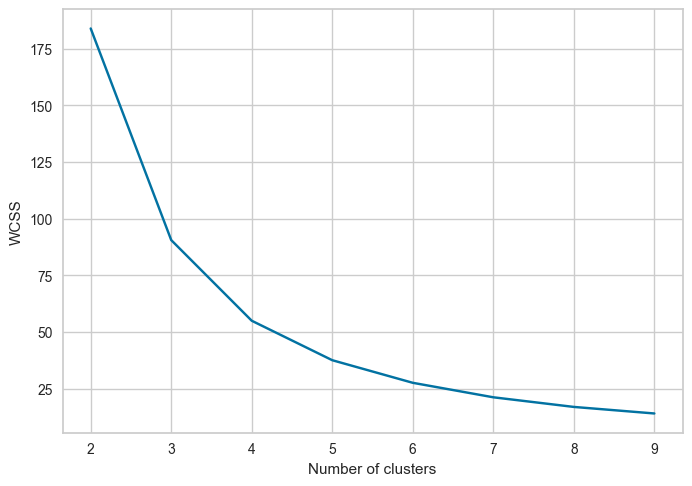

In [145]:
# List untuk menyimpan within-cluster sums of square untuk setiap jumlah cluster
wcss = []

for i in k:    
    kmeans = KMeans(n_clusters=i, random_state=42).fit(attribute_choose)
    wcss.append(kmeans.inertia_)
plt.plot(k, wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Elbow Method menunjukkan jumlah cluster yang paling optimal berjumlah 3

## Silhouette Visualizer
Selain menggunakan Metrik Silhoutte Coefficient dan Elbow Method, kami menggunakan Silhouette Visualizer untuk memastikan didapat K yang optimal

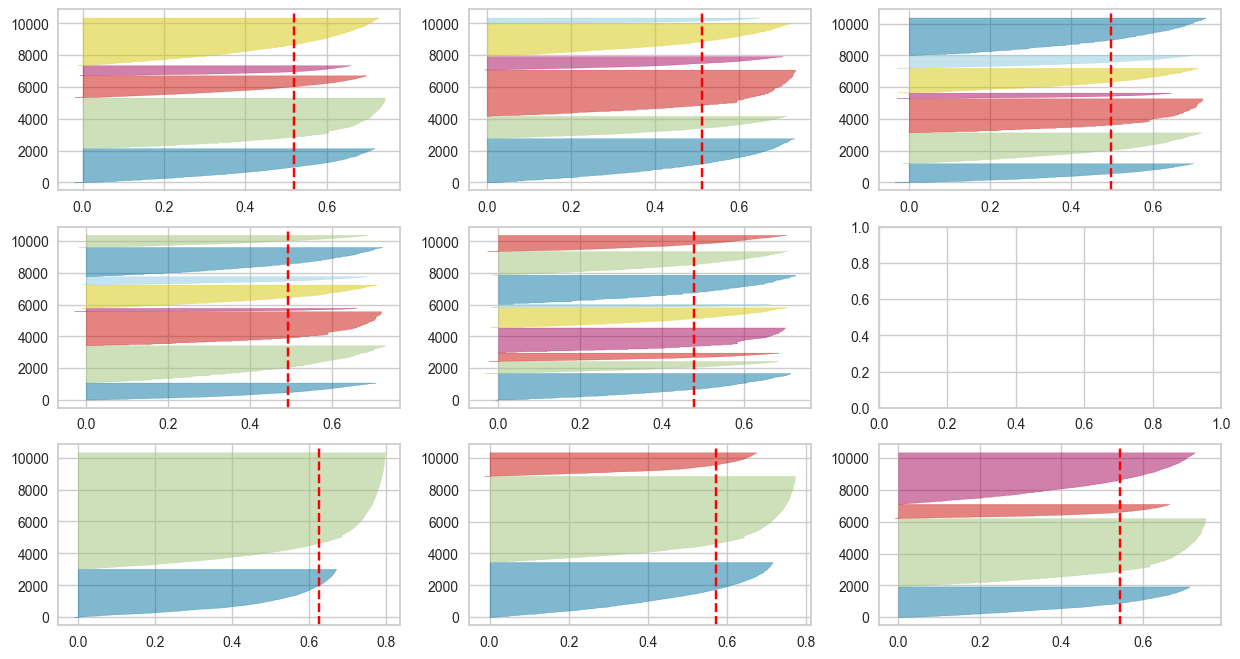

In [146]:
fig, ax = plt.subplots(3, 3, figsize=(15,8))
for i in k:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i-2, 3)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(attribute_choose) 

Dari hasil visualisasi Silhouette Visualizer, saat k=2 dan k=3 terlihat bahwa ukuran cluster berbeda (cluster dapat dibedakan) dan terpisah dengan baik

## Silhouette Method

In [147]:
sil = []

for i in k:
  kmeans = KMeans(n_clusters=i, random_state=42).fit(attribute_choose)
  labels = kmeans.labels_
  score = silhouette_score(attribute_choose, labels, metric='euclidean')
  sil.append(score)
best_k = sil.index(max(sil)) + 2
print("Setelah diterapkan Silhouette Method, nilai K yang paling optimal yaitu K=", best_k)

Setelah diterapkan Silhouette Method, nilai K yang paling optimal yaitu K= 2


Dari keempat cara (Metrik Silhoutte Coefficient, Elbow Method, Silhouette Visualizer, dan Silhouette Method), kami memilih K=2

## Menerapkan K-Means Clustering dengan K=2

In [148]:
# Clustering menggunakan data sebelum di normalisasi (tanpa attribute 'Name' dan 'Team')
combined_data_df2 = combined_data_df.copy()
combined_data_df2 = combined_data_df2.drop("Player", axis=1)
combined_data_df2 = combined_data_df2.drop("Name", axis=1)
combined_data_df2 = combined_data_df2.drop("Tm", axis=1)

In [149]:
count_kmeans = KMeans(n_clusters=2, random_state=42)
count_kmeans.fit(attribute_choose)
predict_kmeans = count_kmeans.predict(attribute_choose)

combined_data_df2 = combined_data_df2.drop(columns=new_attribute)
combined_data_df3 = combined_data_df.copy()
combined_data_df3 = combined_data_df3.drop("Player", axis=1)
combined_data_df3 = combined_data_df3.drop("Name", axis=1)
combined_data_df3 = combined_data_df3.drop("Tm", axis=1)
combined_data_df3 = combined_data_df3.drop(columns=combined_data_df2.columns)

# tampilkan attribute_choose dan cluster
combined_data_df3['cluster'] = predict_kmeans
combined_data_df3

,FG,PTS,cluster
0,4.5,11.4,0
1,4.8,12.2,0
2,3.4,8.9,1
3,7.2,20.3,0
4,1.0,2.8,1
...,...,...,...
10310,0.0,0.0,1
10311,4.0,11.5,0
10312,3.6,8.9,1
10313,3.4,8.5,1


In [150]:
df_copy['cluster'] = combined_data_df3['cluster'].values
df_copy

,Rk,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,AST,STL,BLK,TOV,PF,PTS,Avg GameScore,Salaries,Rank,cluster
0,1,61,56,25.9,4.5,10.6,424.00,0.0,0.4,0.13,...,1.6,1.0,0.5,1.7,2.4,11.4,7.39,3700000.0,195,0
1,1,46,46,26.2,4.8,11.2,433.00,0.0,0.5,95.00,...,1.6,1.2,0.3,1.9,2.5,12.2,7.83,3700000.0,195,0
2,1,15,10,24.9,3.4,8.7,389.00,0.1,0.1,0.50,...,1.7,0.4,0.8,1.3,2.1,8.9,5.59,3700000.0,195,1
3,2,82,82,39.3,7.2,15.6,465.00,0.4,1.2,302.00,...,3.3,1.1,1.1,3.0,3.0,20.3,15.83,3700000.0,157,0
4,3,29,2,11.3,1.0,3.4,286.00,0.3,1.2,257.00,...,2.0,0.8,0.1,1.0,1.3,2.8,2.06,3700000.0,283,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10310,528,2,0,5.5,0.0,1.0,0.00,0.0,0.5,0.00,...,0.5,0.0,0.0,0.0,2.0,0.0,0.15,1933941.0,339,1
10311,528,4,1,20.5,4.0,7.0,571.00,0.0,0.0,0.00,...,0.8,0.3,0.8,1.0,4.0,11.5,8.92,1933941.0,339,0
10312,530,59,37,17.6,3.6,6.4,559.00,0.0,0.0,0.00,...,1.1,0.2,0.9,1.2,2.3,8.9,7.77,1544951.0,389,1
10313,530,33,12,15.6,3.4,5.8,0.58,0.0,0.0,0.00,...,0.8,0.1,0.8,1.0,2.2,8.5,7.13,1544951.0,389,1


## Visualisasi Cluster
Menggunakan data yang sudah di normalisasi agar lebih mudah melihat scalenya

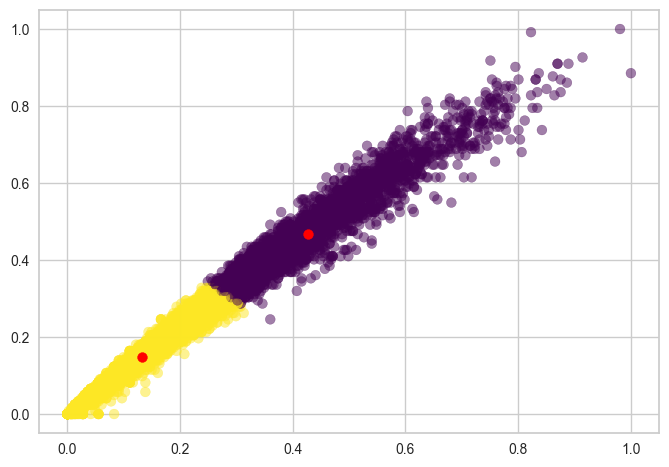

In [151]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(normalized_df.loc[:,new_attribute])
centroids = kmeans.cluster_centers_

plt.scatter(attribute1, attribute2, c= kmeans.labels_.astype(float), s=50, alpha=0.5, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

## Interpretasi Cluster

In [152]:
keep_cluster, keep_cluster2 = [], []

# menyimpan pengelompokkan cluster 0 dan 1
for i in range(len(predict_kmeans)) :
    if predict_kmeans[i] == 0 :
        keep_cluster.append(i)
    else:
        keep_cluster2.append(i)
        
# untuk cluster 0 dan 1
cluster_zero, cluster_one = combined_data_df.iloc[keep_cluster], combined_data_df.iloc[keep_cluster2]

## Interpretasi Cluster

Interpretasi cluster berdasarkan 2P

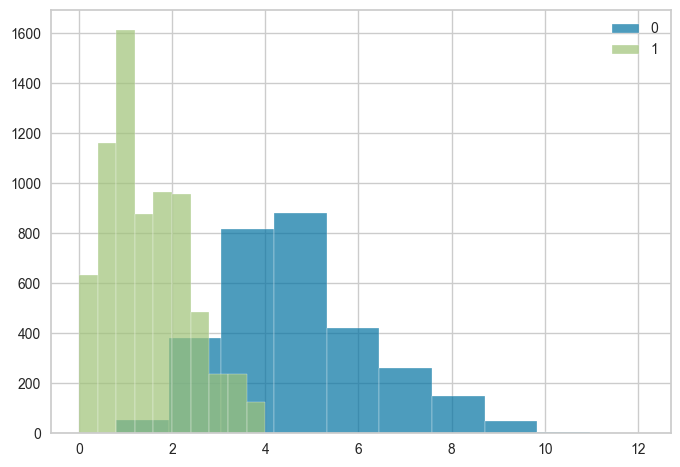

In [153]:
df_copy[df_copy['cluster'] == 0]['2P'].hist(bins=10, alpha=0.7)
df_copy[df_copy['cluster'] == 1]['2P'].hist(bins=10, alpha=0.7)

plt.legend(['0', '1'])
plt.show()

Interpretasi cluster berdasarkan 3P

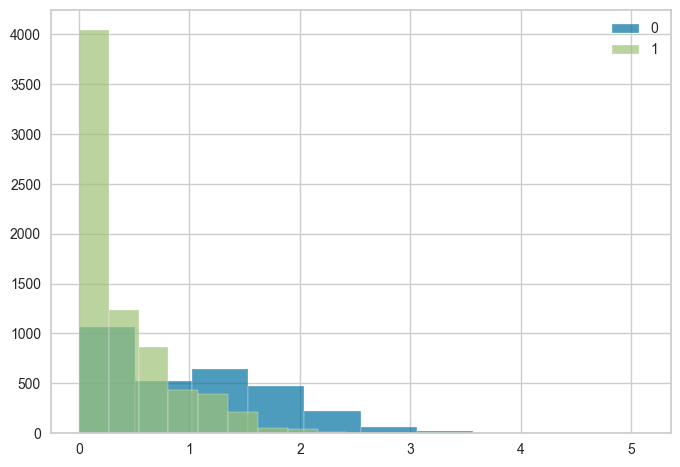

In [154]:
df_copy[df_copy['cluster'] == 0]['3P'].hist(bins=10, alpha=0.7)
df_copy[df_copy['cluster'] == 1]['3P'].hist(bins=10, alpha=0.7)

plt.legend(['0', '1'])
plt.show()

Interpretasi cluster berdasarkan Salaries

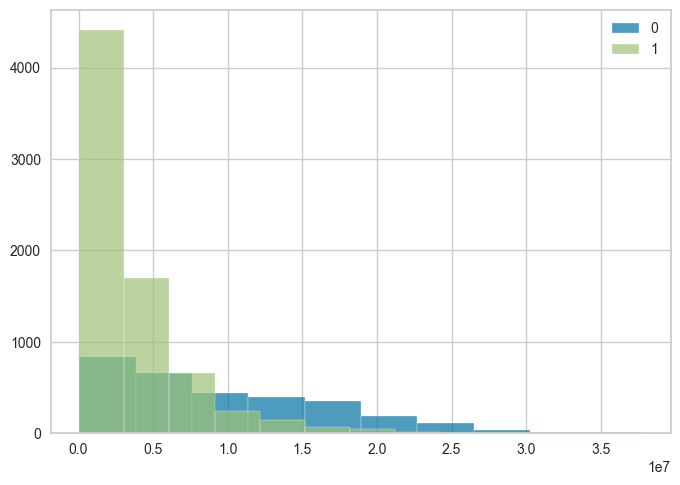

In [155]:
df_copy[df_copy['cluster'] == 0]['Salaries'].hist(bins=10, alpha=0.7)
df_copy[df_copy['cluster'] == 1]['Salaries'].hist(bins=10, alpha=0.7)

plt.legend(['0', '1'])
plt.show()

Interpretasi cluster berdasarkan Avg GameScore

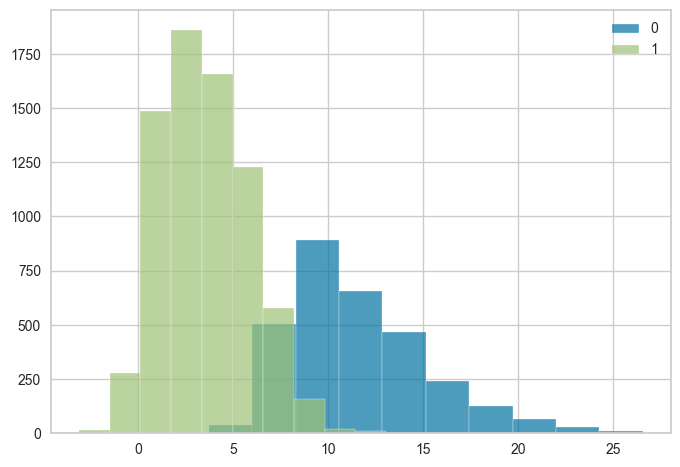

In [156]:
df_copy[df_copy['cluster'] == 0]['Avg GameScore'].hist(bins=10, alpha=0.7)
df_copy[df_copy['cluster'] == 1]['Avg GameScore'].hist(bins=10, alpha=0.7)

plt.legend(['0', '1'])
plt.show()

Interpretasi cluster bedasarkan FT

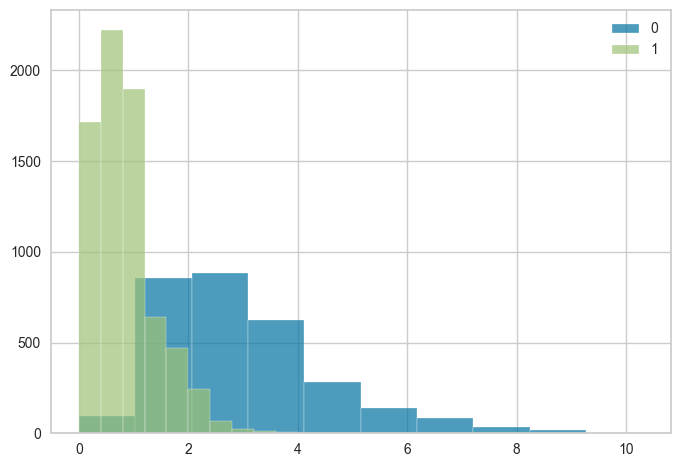

In [157]:
df_copy[df_copy['cluster'] == 0]['FT'].hist(bins=10, alpha=0.7)
df_copy[df_copy['cluster'] == 1]['FT'].hist(bins=10, alpha=0.7)

plt.legend(['0', '1'])
plt.show()

## Kesimpulan

1. Persebaran pemain pada cluster 0, lebih banyak mencetak 2 Poin daripada para pemain dalam cluster bagian 1
2. Persebaran pemain pada cluster 0, lebih banyak mencetak 3 Poin daripada para pemain dalam cluster bagian 1
3. Persebaran pemain pada cluster 0, mendapat rata-rata gaji yang lebih besar daripada pemain dalam cluster bagian 1
4. Persebaran pemain pada cluster 0, melakukan lebih banyak Free Throw daripada pemain dalam cluster bagian 1